## Análise Individual por Modelo - Zeroshot

In [24]:
# Carregar todos os arquivos zeroshot da raiz
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

model_parameters = {
    "openai_gpt4": "—",
    "ollama_deepseek_15b": "1.5b",
    "ollama_qwen3_0_6b": "0.6b",
    "ollama_qwen3_1_7b": "1.7b",
    "ollama_qwen3_4b": "4b",
    "ollama_qwen3_8b": "8b",
    "ollama_llama3_1_8b": "8b",
    "ollama_llama3_2_1b": "1b",
    "ollama_llama3_2_3b": "3b",
    "ollama_deepseek_r1_7b": "7b",
    "ollama_deepseek_r1_8b": "8b",
    "ollama_deepseek_r1_14b": "14b",
    "ollama_mistral_7b": "7b",
    "ollama_phi3_3_8b": "3.8b",
    "ollama_phi3_14b": "14b",
    "ollama_smollm2_135m": "135m",
    "ollama_smollm2_360m": "360m",
    "ollama_smollm2_1_7b": "1.7b",
    "ollama_falcon3_1b": "1b",
    "ollama_falcon3_3b": "3b",
    "ollama_falcon3_7b": "7b",
    "ollama_falcon3_10b": "10b",
    "ollama_gemma3_270m": "270m",
    "ollama_gemma3_1b": "1b",
    "ollama_gemma3_4b": "4b",
    "ollama_gemma3_12b": "12b",
    "ollama_granite3_2_2b": "2b",
    "ollama_granite3_2_8b": "8b",
    "ollama_fundation_sec_8b": "8b",
    "ollama_gpt_oss_20b": "20b",
    "ollama_deepseek_r1_32b": "32b",
    "ollama_gemma3_27b": "27b",
    "ollama_qwen3_14b": "14b",
    "ollama_qwen3_30b": "30b",
    "ollama_qwen3_32b": "32b",
    "ollama_phi4_14b": "14b",
    "ollama_smollm_135m": "135m",
    "ollama_smollm_360m": "360m"
}


# Função para extrair nome do modelo do arquivo
def extract_model_from_filename(filename):
    """Extrai modelo e parâmetros do nome do arquivo"""
    name = filename.replace('resultados_ollama_', '').replace('.xlsx', '')
    name_model = filename.replace('resultados_','').replace('_zeroshot.xlsx','')
    parametros =  model_parameters[name_model]
    print(parametros)
    return name, parametros

# Carregar arquivo de categorias reais
df_real = pd.read_excel("data/24_incidentes.xlsx")

# Buscar todos os arquivos zeroshot
zeroshot_files = sorted(glob.glob("resultados_ollama_*_zeroshot.xlsx"))

print(f"Total de arquivos zeroshot encontrados: {len(zeroshot_files)}")
print(f"Categorias reais disponíveis: {len(df_real)} incidentes")

Total de arquivos zeroshot encontrados: 0
Categorias reais disponíveis: 24 incidentes


In [46]:
name_model = 'resultados_ollama_deepseek_15b_zeroshot.xlsx'.replace('resultados_','').replace('_zeroshot.xlsx','')
model_parameters[name_model]

'1.5b'

In [50]:
# Consolidar dados de todos os modelos
resultados_modelos = []

for file in zeroshot_files:
    try:
        # Carregar arquivo
        df = pd.read_excel(file)
        
        # Extrair modelo
        model_name, param = extract_model_from_filename(file)
        model_full = f"{model_name}"
        
        # Padronizar coluna de categoria
        if 'Category' in df.columns:
            df.rename(columns={'Category': 'categoria_predita'}, inplace=True)
        elif 'categoria' in df.columns:
            df.rename(columns={'categoria': 'categoria_predita'}, inplace=True)
        #df['parametros'] = param
        
        # Merge com categorias reais
        df = df.merge(df_real[['id', 'categoria']], on='id', how='left')
        df.rename(columns={'categoria': 'categoria_real'}, inplace=True)
        
        # Calcular acertos
        df['acertou'] = (df['categoria_real'] == df['categoria_predita']).astype(int)
        
        # Calcular métricas
        total = len(df)
        acertos = df['acertou'].sum()
        erros = total - acertos
        percentual_acerto = (acertos / total * 100) if total > 0 else 0
        percentual_erro = (erros / total * 100) if total > 0 else 0
        
        resultados_modelos.append({
            'modelo': model_full,
            'model_name': model_name,
            'parametros': param,
            'total': total,
            'acertos': acertos,
            'erros': erros,
            'percentual_acerto': round(percentual_acerto, 2),
            'percentual_erro': round(percentual_erro, 2),
            'df': df
        })
        
        print(f"✓ {model_full}: {acertos}/{total} acertos ({percentual_acerto:.2f}%)")
        
    except Exception as e:
        print(f"✗ Erro em {file}: {str(e)}")

# Criar DataFrame resumo
df_resumo = pd.DataFrame([{k: v for k, v in r.items() if k != 'df'} for r in resultados_modelos])
df_resumo = df_resumo.sort_values('percentual_acerto', ascending=False)

print(f"\n{'='*80}")
print("RESUMO GERAL - TODOS OS MODELOS")
print('='*80)
print(df_resumo.to_string(index=False))

1.5b
✓ deepseek_15b_zeroshot: 4/24 acertos (16.67%)
14b
✓ deepseek_r1_14b_zeroshot: 14/24 acertos (58.33%)
32b
✓ deepseek_r1_32b_zeroshot: 14/24 acertos (58.33%)
7b
✓ deepseek_r1_7b_zeroshot: 11/24 acertos (45.83%)
8b
✓ deepseek_r1_8b_zeroshot: 5/24 acertos (20.83%)
10b
✓ falcon3_10b_zeroshot: 16/24 acertos (66.67%)
1b
✓ falcon3_1b_zeroshot: 0/24 acertos (0.00%)
3b
✓ falcon3_3b_zeroshot: 11/24 acertos (45.83%)
7b
✓ falcon3_7b_zeroshot: 12/24 acertos (50.00%)
8b
✓ fundation_sec_8b_zeroshot: 3/24 acertos (12.50%)
12b
✓ gemma3_12b_zeroshot: 12/24 acertos (50.00%)
1b
✓ gemma3_1b_zeroshot: 1/24 acertos (4.17%)
270m
✓ gemma3_270m_zeroshot: 0/24 acertos (0.00%)
27b
✓ gemma3_27b_zeroshot: 12/24 acertos (50.00%)
4b
✓ gemma3_4b_zeroshot: 7/24 acertos (29.17%)
20b
✓ gpt_oss_20b_zeroshot: 15/24 acertos (62.50%)
2b
✓ granite3_2_2b_zeroshot: 2/24 acertos (8.33%)
8b
✓ granite3_2_8b_zeroshot: 17/24 acertos (70.83%)
8b
✓ llama3_1_8b_zeroshot: 15/24 acertos (62.50%)
1b
✓ llama3_2_1b_zeroshot: 0/24 acert

In [70]:
pd.read_excel(file)
 

,Response,Processed,Category,Explanation,id
0,"Based on the given incident description, we ca...","{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2022-125941
1,Based on the provided incident description and...,"{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2022-026802
2,"Based on the provided incident description, th...","{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2022-042745
3,The provided incident description does not fit...,"{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2022-026209
4,Based on my understanding of the incident desc...,"{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2023-049266
5,The security expert can classify the incident ...,"{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2023-056851
6,The response provided does not have a clear ex...,"{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2022-025034
7,I'm glad you asked! I'll make sure to provide ...,"{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2022-045328
8,"Yes, I can help with that!\n\nI'd be happy to ...","{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2023-032613
9,To classify this incident description into one...,"{'Category': 'Unknown', 'Explanation': 'Unknown'}",Unknown,Unknown,RNP2022-107571


In [51]:
df_resumo

,modelo,model_name,parametros,total,acertos,erros,percentual_acerto,percentual_erro
17,granite3_2_8b_zeroshot,granite3_2_8b_zeroshot,8b,24,17,7,70.83,29.17
5,falcon3_10b_zeroshot,falcon3_10b_zeroshot,10b,24,16,8,66.67,33.33
18,llama3_1_8b_zeroshot,llama3_1_8b_zeroshot,8b,24,15,9,62.50,37.50
15,gpt_oss_20b_zeroshot,gpt_oss_20b_zeroshot,20b,24,15,9,62.50,37.50
2,deepseek_r1_32b_zeroshot,deepseek_r1_32b_zeroshot,32b,24,14,10,58.33,41.67
1,deepseek_r1_14b_zeroshot,deepseek_r1_14b_zeroshot,14b,24,14,10,58.33,41.67
29,qwen3_4b_zeroshot,qwen3_4b_zeroshot,4b,24,14,10,58.33,41.67
25,qwen3_14b_zeroshot,qwen3_14b_zeroshot,14b,24,13,11,54.17,45.83
26,qwen3_1_7b_zeroshot,qwen3_1_7b_zeroshot,1.7b,24,12,12,50.00,50.00
13,gemma3_27b_zeroshot,gemma3_27b_zeroshot,27b,24,12,12,50.00,50.00


In [52]:
df_resumo.dtypes

modelo                object
model_name            object
parametros            object
total                  int64
acertos                int64
erros                  int64
percentual_acerto    float64
percentual_erro      float64
dtype: object

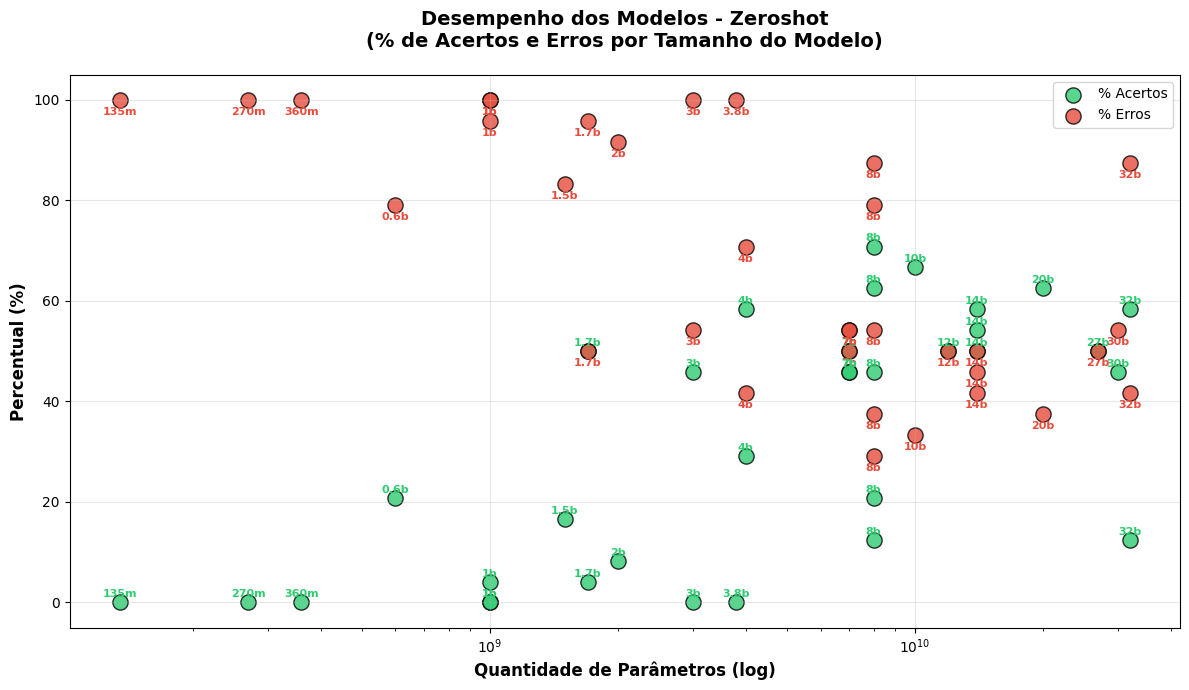

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Converter coluna de parâmetros para número (b -> bilhões, m -> milhões)
def parse_params(p):
    if isinstance(p, str):
        p = p.lower().strip()
        if 'b' in p:
            return float(p.replace('b', '')) * 1e9
        elif 'm' in p:
            return float(p.replace('m', '')) * 1e6
    return np.nan

df_resumo['parametros_num'] = df_resumo['parametros'].apply(parse_params)

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

# Scatter de acertos e erros
ax.scatter(df_resumo['parametros_num'], df_resumo['percentual_acerto'], 
           color='#2ecc71', s=120, label='% Acertos', alpha=0.8, edgecolor='black')
ax.scatter(df_resumo['parametros_num'], df_resumo['percentual_erro'], 
           color='#e74c3c', s=120, label='% Erros', alpha=0.8, edgecolor='black')

# Anotar os modelos no gráfico
for i, row in df_resumo.iterrows():
    ax.text(row['parametros_num'], row['percentual_acerto'] + 1, 
            row['parametros'], fontsize=8, ha='center', fontweight='bold', color='#2ecc71')
    ax.text(row['parametros_num'], row['percentual_erro'] - 3, 
            row['parametros'], fontsize=8, ha='center', fontweight='bold', color='#e74c3c')

# Configurações do gráfico
ax.set_xscale('log')  # Escala logarítmica ajuda na visualização (modelos de 135M a 32B)
ax.set_xlabel('Quantidade de Parâmetros (log)', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentual (%)', fontsize=12, fontweight='bold')
ax.set_title('Desempenho dos Modelos - Zeroshot\n(% de Acertos e Erros por Tamanho do Modelo)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(alpha=0.3)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


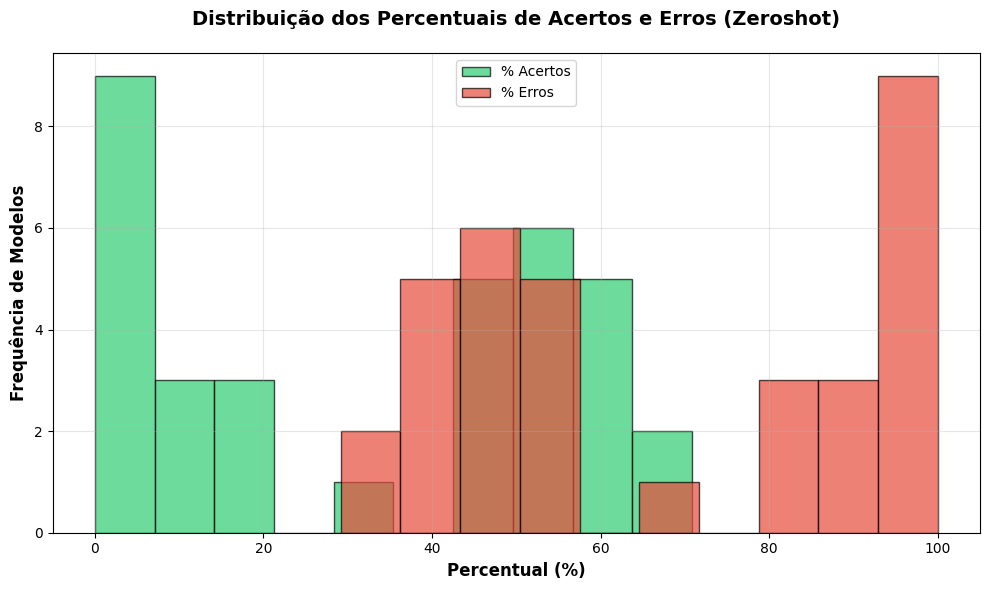

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Histogramas de acertos e erros
ax.hist(df_resumo['percentual_acerto'], bins=10, alpha=0.7, color='#2ecc71', label='% Acertos', edgecolor='black')
ax.hist(df_resumo['percentual_erro'], bins=10, alpha=0.7, color='#e74c3c', label='% Erros', edgecolor='black')

# Configurações visuais
ax.set_xlabel('Percentual (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequência de Modelos', fontsize=12, fontweight='bold')
ax.set_title('Distribuição dos Percentuais de Acertos e Erros (Zeroshot)', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


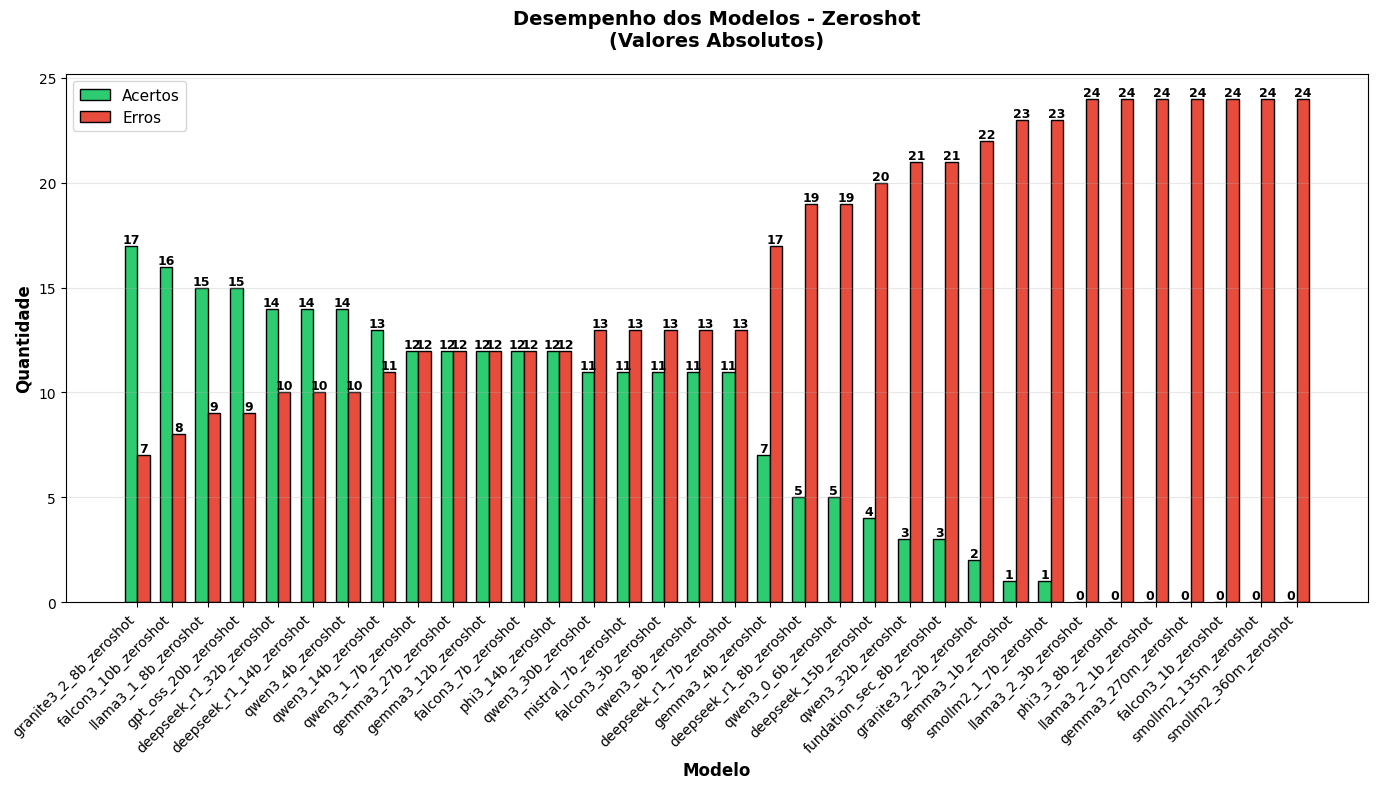

In [53]:
# Gráfico 1: Acertos vs Erros - Valores Absolutos
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(df_resumo))
width = 0.35

bars1 = ax.bar(x - width/2, df_resumo['acertos'], width, label='Acertos', color='#2ecc71', edgecolor='black')
bars2 = ax.bar(x + width/2, df_resumo['erros'], width, label='Erros', color='#e74c3c', edgecolor='black')

ax.set_xlabel('Modelo', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
ax.set_title('Desempenho dos Modelos - Zeroshot\n(Valores Absolutos)', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_resumo['modelo'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

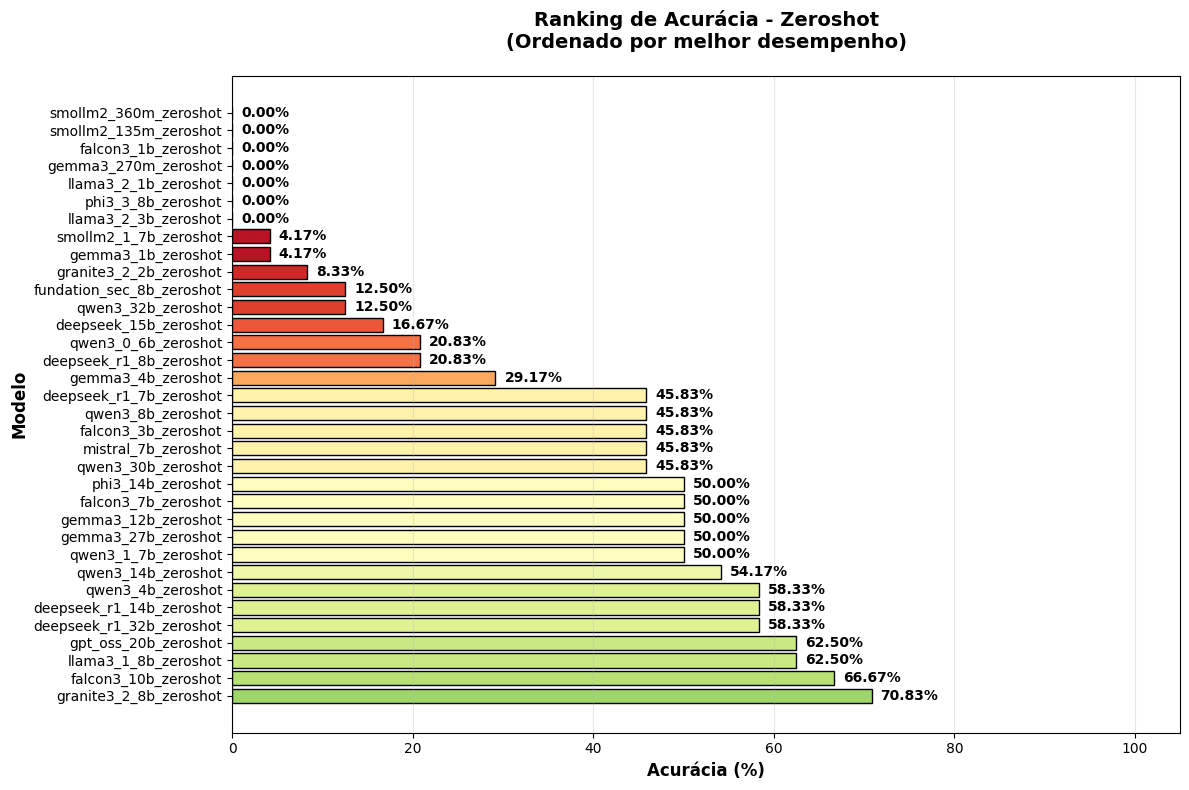


🏆 Melhor modelo: granite3_2_8b_zeroshot com 70.83% de acertos
📊 Acurácia média: 32.35%


In [57]:
# Gráfico 3: Ranking de Acurácia
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.RdYlGn(df_resumo['percentual_acerto'] / 100)
bars = ax.barh(df_resumo['modelo'], df_resumo['percentual_acerto'], color=colors, edgecolor='black')

ax.set_xlabel('Acurácia (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Modelo', fontsize=12, fontweight='bold')
ax.set_title('Ranking de Acurácia - Zeroshot\n(Ordenado por melhor desempenho)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.set_xlim(0, 105)

# Adicionar valores nas barras
for i, (bar, val) in enumerate(zip(bars, df_resumo['percentual_acerto'])):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2,
            f'{val:.2f}%',
            va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n🏆 Melhor modelo: {df_resumo.iloc[0]['modelo']} com {df_resumo.iloc[0]['percentual_acerto']:.2f}% de acertos")
print(f"📊 Acurácia média: {df_resumo['percentual_acerto'].mean():.2f}%")

### Matriz de Confusão - Individual por Modelo

In [58]:
# Gerar matriz de confusão para cada modelo
# Obter todas as categorias únicas do dataset
all_categories = sorted(df_real['categoria'].unique())

print(f"Categorias no dataset: {all_categories}")
print(f"\nTotal de modelos a processar: {len(resultados_modelos)}")
print("="*80)

Categorias no dataset: ['CAT12', 'CAT2', 'CAT3', 'CAT5', 'CAT7', 'CAT9']

Total de modelos a processar: 34


### Análise de Erros por Modelo - Quais categorias foram trocadas

In [50]:
# Para cada modelo, mostrar os erros mais frequentes
print("="*100)
print("ANÁLISE DE ERROS - TOP 5 TROCAS MAIS FREQUENTES POR MODELO")
print("="*100)

for resultado in resultados_modelos:
    modelo = resultado['modelo']
    df_modelo = resultado['df']
    
    # Filtrar apenas erros
    df_erros = df_modelo[df_modelo['acertou'] == 0].copy()
    
    if len(df_erros) > 0:
        # Contar trocas
        trocas = df_erros.groupby(['categoria_real', 'categoria_predita']).size().reset_index(name='quantidade')
        trocas = trocas.sort_values('quantidade', ascending=False).head(5)
        
        print(f"\n📌 {modelo} ({resultado['erros']} erros no total):")
        print("-"*100)
        
        for idx, row in trocas.iterrows():
            print(f"   {row['categoria_real']} → {row['categoria_predita']}: {row['quantidade']} vezes")
    else:
        print(f"\n📌 {modelo}: ✅ Sem erros!")
    
print("\n" + "="*100)

ANÁLISE DE ERROS - TOP 5 TROCAS MAIS FREQUENTES POR MODELO

📌 deepseek_15b_zeroshot (20 erros no total):
----------------------------------------------------------------------------------------------------
   CAT12 → Third-Party Issues: 2 vezes
   CAT3 → CAT12: 2 vezes
   CAT5 → CAT12: 2 vezes
   CAT7 → CAT12: 2 vezes
   CAT9 → CAT7: 2 vezes

📌 deepseek_r1_14b_zeroshot (10 erros no total):
----------------------------------------------------------------------------------------------------
   CAT12 → CAT1: 2 vezes
   CAT2 → CAT12: 2 vezes
   CAT12 → CAT10: 1 vezes
   CAT3 → CAT12: 1 vezes
   CAT5 → CAT12: 1 vezes

📌 deepseek_r1_7b_zeroshot (13 erros no total):
----------------------------------------------------------------------------------------------------
   CAT12 → CAT5: 2 vezes
   CAT2 → CAT12: 1 vezes
   CAT2 → CAT5: 1 vezes
   CAT2 → CAT8: 1 vezes
   CAT3 → CAT1: 1 vezes

📌 deepseek_r1_8b_zeroshot (19 erros no total):
-------------------------------------------------------------

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Agrupar todas as trocas de todos os modelos
lista_erros = []

for resultado in resultados_modelos:
    modelo = resultado['modelo']
    df_modelo = resultado['df']
    
    # Filtrar erros
    df_erros = df_modelo[df_modelo['acertou'] == 0].copy()
    if len(df_erros) > 0:
        # Adiciona colunas úteis
        df_erros['modelo'] = modelo
        lista_erros.append(df_erros[['modelo', 'categoria_real', 'categoria_predita']])

# Concatenar todos os erros
df_erros_all = pd.concat(lista_erros, ignore_index=True)

# 2️⃣ Criar tabela de frequência (matriz de confusão agregada)
tabela_trocas = df_erros_all.groupby(['categoria_real', 'categoria_predita']).size().unstack(fill_value=0)

In [63]:
tabela_trocas

categoria_predita,Abuse From [IP_ADDRESS_984299dc8f],Account compromise unauthorized access,CAT1,CAT10,CAT11,CAT12,CAT15 (Mixed Threat),CAT2,CAT3,CAT4,...,CAT6,CAT7,CAT8,CAT9,"Exploit using flaws, number5.","Exploitation using flawsCVE, insecure NTP open.","Intrusion Attempt. Network scans, brute force, blocked exploit attempts are common here before a full attack happens.",Third-Party Issues,Unknown,no mention credentials phishing etc not here
categoria_real,,,,,,,,,,,,,,,,,,,,,
CAT12,1,0,36,11,4,0,1,2,1,2,...,0,5,0,0,0,0,0,2,27,0
CAT2,0,0,6,13,3,21,0,0,5,1,...,2,7,5,1,0,0,0,0,34,0
CAT3,0,0,17,10,0,12,0,0,0,2,...,1,1,1,0,0,0,1,0,33,0
CAT5,0,1,4,10,0,23,0,4,22,2,...,1,1,1,1,0,0,0,0,39,0
CAT7,0,0,5,11,1,6,0,4,9,1,...,0,0,3,22,0,1,0,0,35,0
CAT9,0,0,3,1,0,4,0,0,1,4,...,0,6,1,0,1,0,0,0,30,1


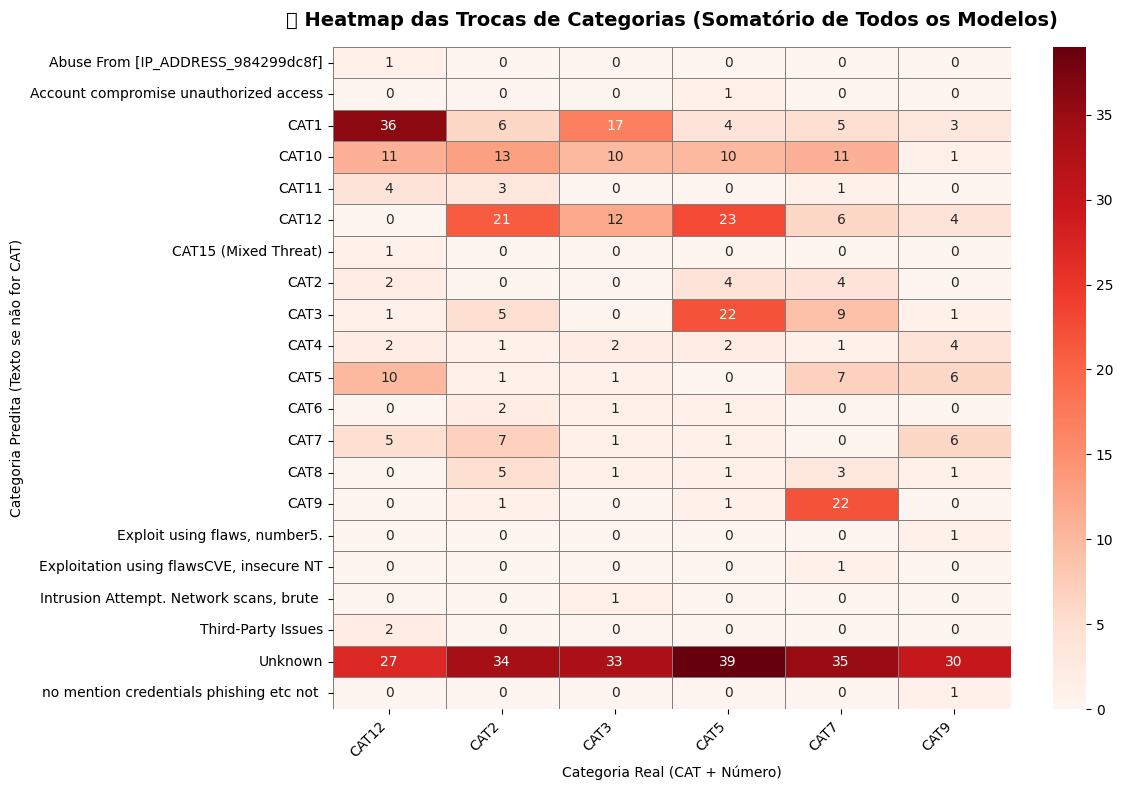

In [61]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

# 🔁 Transpor a tabela de trocas (para colocar categorias reais no eixo X)
tabela_plot = tabela_trocas.T.copy()

# 🔤 Função para formatar nomes das categorias
def formatar_categoria(cat):
    """
    Mantém o texto completo se não for no formato CAT + número,
    caso contrário, mantém como está.
    """
    if re.match(r'^CAT\d+$', str(cat).strip()):  # Ex: CAT1, CAT12, etc
        return cat
    return str(cat)[:40]  # corta textos longos (opcional)

# Aplicar formatação
tabela_plot.index = [formatar_categoria(c) for c in tabela_plot.index]
tabela_plot.columns = [formatar_categoria(c) for c in tabela_plot.columns]

# 🎨 Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    tabela_plot,
    annot=True,
    fmt='d',
    cmap='Reds',
    linewidths=0.5,
    linecolor='gray'
)

plt.title('🔥 Heatmap das Trocas de Categorias (Somatório de Todos os Modelos)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Categoria Real (CAT + Número)')
plt.ylabel('Categoria Predita (Texto se não for CAT)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Modelos considerados: ['deepseek_r1_14b_zeroshot', 'deepseek_r1_32b_zeroshot', 'deepseek_r1_7b_zeroshot', 'falcon3_10b_zeroshot', 'falcon3_3b_zeroshot', 'falcon3_7b_zeroshot', 'gemma3_12b_zeroshot', 'gemma3_27b_zeroshot', 'gpt_oss_20b_zeroshot', 'granite3_2_8b_zeroshot', 'llama3_1_8b_zeroshot', 'mistral_7b_zeroshot', 'phi3_14b_zeroshot', 'qwen3_14b_zeroshot', 'qwen3_1_7b_zeroshot', 'qwen3_30b_zeroshot', 'qwen3_4b_zeroshot', 'qwen3_8b_zeroshot']
Total: 18 modelos com >30% de acerto


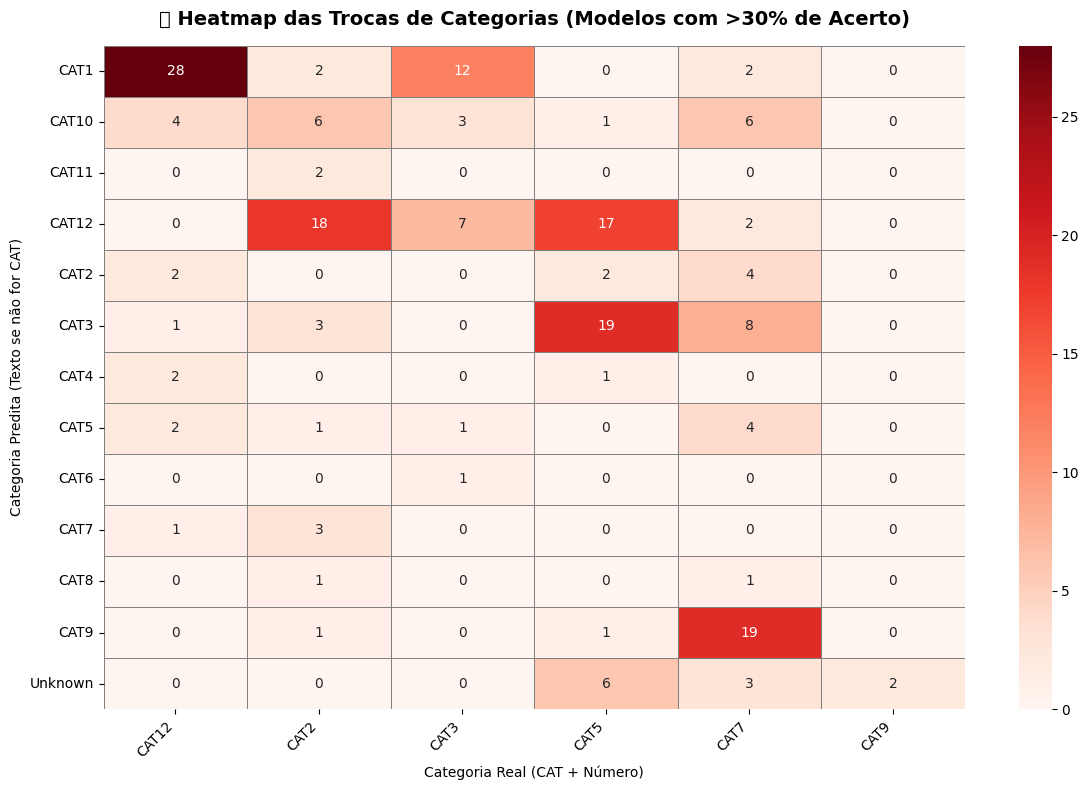

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 🔹 Filtrar apenas modelos com mais de 30% de acerto
modelos_filtrados = [r for r in resultados_modelos if r['percentual_acerto'] > 30]

print(f"Modelos considerados: {[m['modelo'] for m in modelos_filtrados]}")
print(f"Total: {len(modelos_filtrados)} modelos com >30% de acerto")

# 🔹 Consolidar todas as trocas dos modelos filtrados
todas_trocas = []

for resultado in modelos_filtrados:
    df_modelo = resultado['df']
    df_erros = df_modelo[df_modelo['acertou'] == 0].copy()

    if not df_erros.empty:
        trocas = df_erros.groupby(['categoria_real', 'categoria_predita']).size().reset_index(name='quantidade')
        trocas['modelo'] = resultado['modelo']
        todas_trocas.append(trocas)

# 🔹 Concatenar e somar as trocas
if todas_trocas:
    df_trocas = pd.concat(todas_trocas, ignore_index=True)
    tabela_trocas = df_trocas.groupby(['categoria_real', 'categoria_predita'])['quantidade'].sum().unstack(fill_value=0)
else:
    raise ValueError("Nenhum modelo com mais de 30% de acerto gerou erros para análise.")

# 🔁 Transpor para ter categorias reais no eixo X
tabela_plot = tabela_trocas.T.copy()

# 🔤 Função para formatar categorias preditas
def formatar_categoria(cat):
    if re.match(r'^CAT\d+$', str(cat).strip()):  # mantém CAT + número
        return cat
    return str(cat)[:40]  # mantém texto curto se for descrição longa

tabela_plot.index = [formatar_categoria(c) for c in tabela_plot.index]
tabela_plot.columns = [formatar_categoria(c) for c in tabela_plot.columns]

# 🎨 Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    tabela_plot,
    annot=True,
    fmt='d',
    cmap='Reds',
    linewidths=0.5,
    linecolor='gray'
)

plt.title('🔥 Heatmap das Trocas de Categorias (Modelos com >30% de Acerto)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Categoria Real (CAT + Número)')
plt.ylabel('Categoria Predita (Texto se não for CAT)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


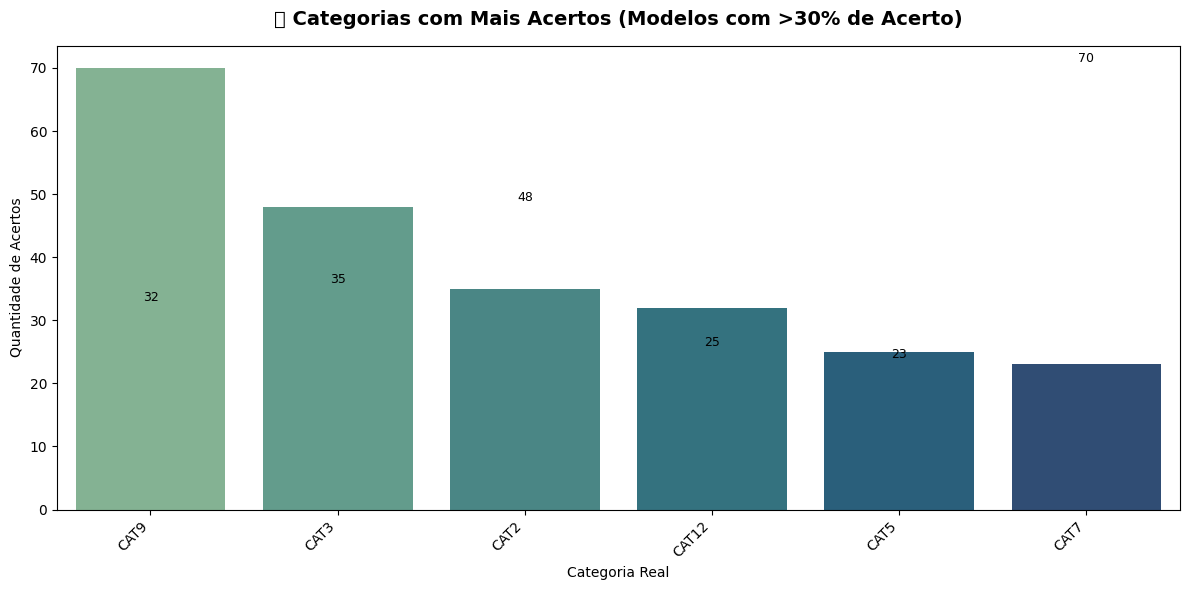

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Filtrar apenas os modelos com mais de 30% de acerto
modelos_filtrados = [r for r in resultados_modelos if r['percentual_acerto'] > 30]

# 🔹 Consolidar acertos por categoria real
todas_categorias = []

for resultado in modelos_filtrados:
    df = resultado['df'].copy()
    df_acertos = df[df['acertou'] == 1]  # apenas acertos
    df_acertos['modelo'] = resultado['modelo']
    todas_categorias.append(df_acertos[['modelo', 'categoria_real']])

# 🔹 Concatenar todos os acertos
df_todos_acertos = pd.concat(todas_categorias, ignore_index=True)

# 🔹 Contar acertos por categoria real
df_acertos_categoria = (
    df_todos_acertos.groupby('categoria_real')
    .size()
    .reset_index(name='quantidade_acertos')
    .sort_values('quantidade_acertos', ascending=False)
)

# 🔹 Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_acertos_categoria,
    x='categoria_real',
    y='quantidade_acertos',
    palette='crest'
)

# 🔹 Adicionar rótulos e estética
for i, row in df_acertos_categoria.iterrows():
    plt.text(i, row['quantidade_acertos'] + 0.5, f"{int(row['quantidade_acertos'])}", 
             ha='center', va='bottom', fontsize=9)

plt.title('Categorias com Mais Acertos (Modelos com >30% de Acerto)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Categoria Real')
plt.ylabel('Quantidade de Acertos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

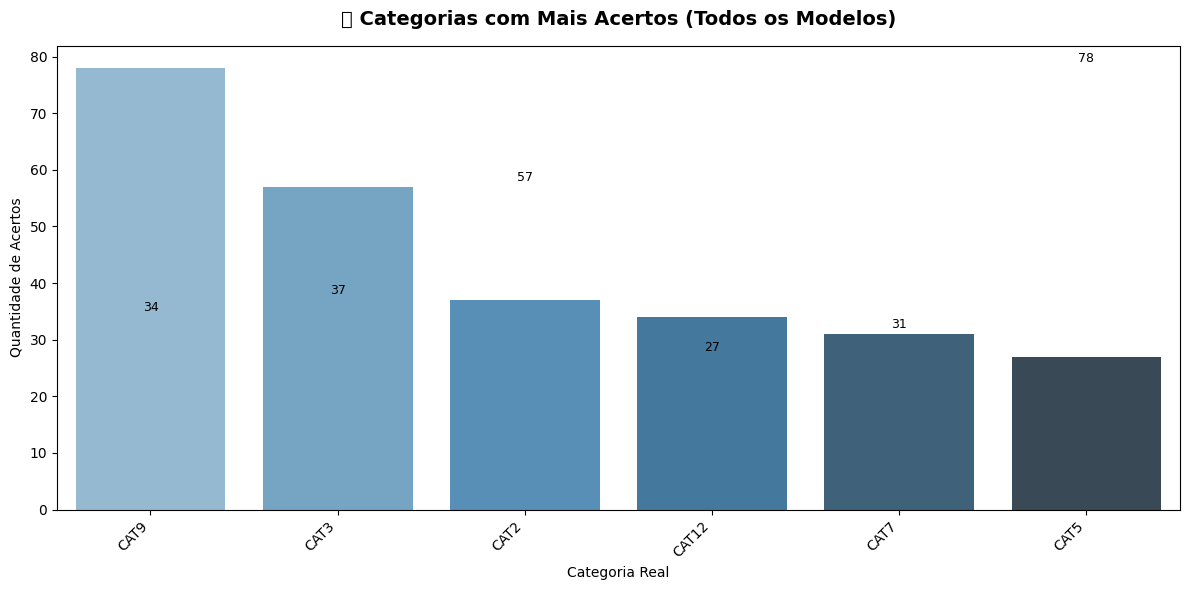

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Consolidar acertos por categoria real para todos os modelos
todas_categorias = []

for resultado in resultados_modelos:
    df = resultado['df'].copy()
    df_acertos = df[df['acertou'] == 1]  # apenas acertos
    df_acertos['modelo'] = resultado['modelo']
    todas_categorias.append(df_acertos[['modelo', 'categoria_real']])

# 🔹 Concatenar todos os acertos
df_todos_acertos = pd.concat(todas_categorias, ignore_index=True)

# 🔹 Contar acertos por categoria real
df_acertos_categoria = (
    df_todos_acertos.groupby('categoria_real')
    .size()
    .reset_index(name='quantidade_acertos')
    .sort_values('quantidade_acertos', ascending=False)
)

# 🔹 Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_acertos_categoria,
    x='categoria_real',
    y='quantidade_acertos',
    palette='Blues_d'
)

# 🔹 Adicionar rótulos e estética
for i, row in df_acertos_categoria.iterrows():
    plt.text(i, row['quantidade_acertos'] + 0.5, f"{int(row['quantidade_acertos'])}", 
             ha='center', va='bottom', fontsize=9)

plt.title('🎯 Categorias com Mais Acertos (Todos os Modelos)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Categoria Real')
plt.ylabel('Quantidade de Acertos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
# Salvar resultados consolidados em Excel
df_resumo_export = df_resumo.copy()
output_file = 'experimentos/resumo_zeroshot_por_modelo.xlsx'

df_resumo_export.to_excel(output_file, index=False)
print(f"✅ Resumo exportado para: {output_file}")

# Mostrar estatísticas finais
print(f"\n{'='*80}")
print("ESTATÍSTICAS FINAIS - ZEROSHOT")
print('='*80)
print(f"Total de modelos analisados: {len(df_resumo)}")
print(f"Melhor modelo: {df_resumo.iloc[0]['modelo']} ({df_resumo.iloc[0]['percentual_acerto']:.2f}%)")
print(f"Pior modelo: {df_resumo.iloc[-1]['modelo']} ({df_resumo.iloc[-1]['percentual_acerto']:.2f}%)")
print(f"Acurácia média: {df_resumo['percentual_acerto'].mean():.2f}%")
print(f"Desvio padrão: {df_resumo['percentual_acerto'].std():.2f}%")
print(f"Mediana: {df_resumo['percentual_acerto'].median():.2f}%")

✅ Resumo exportado para: experimentos/resumo_zeroshot_por_modelo.xlsx

ESTATÍSTICAS FINAIS - ZEROSHOT
Total de modelos analisados: 28
Melhor modelo: granite3_2:8b (70.83%)
Pior modelo: smollm2:360m (0.00%)
Acurácia média: 28.12%
Desvio padrão: 25.95%
Mediana: 25.00%


In [ ]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/511.1 KB ? eta -:--:--  Downloading wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 1.5 MB/s eta 0:00:0000:01


## Análise NLP - Padrões de Acertos e Erros

Análise profunda para entender **por que** os modelos acertam ou erram, usando características textuais dos incidentes.

In [15]:
# Carregar dados completos com os textos dos incidentes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Carregar arquivo com textos completos dos incidentes
df_incidentes_completo = pd.read_excel("data/24_incidentes.xlsx")

print("Estrutura dos dados:")
print(df_incidentes_completo.columns.tolist())
print(f"\nTotal de incidentes: {len(df_incidentes_completo)}")
print("\nPrimeiras linhas:")
df_incidentes_completo.head()

Estrutura dos dados:
['Unnamed: 0', 'id', 'target', 'categoria']

Total de incidentes: 24

Primeiras linhas:


,Unnamed: 0,id,target,categoria
0,1,RNP2022-125941,[DATE_TIME_a989e9db40] 14:47 CERT.br: \nData d...,CAT12
1,2,RNP2022-026802,[DATE_TIME_c056487b2c] 12:51 CERT.br: \nData d...,CAT12
2,3,RNP2022-042745,[DATE_TIME_03857e5518] 08:03 CERT.br: \nData d...,CAT12
3,4,RNP2022-026209,[DATE_TIME_2ac98305e7] 08:39 CERT.br: \nData d...,CAT12
4,5,RNP2023-049266,[DATE_TIME_360012cb84] 07:34 CERT.br: \nData d...,CAT2


In [16]:
# Consolidar todos os resultados dos modelos com informações textuais
# Vamos usar o melhor modelo como exemplo principal

melhor_modelo = df_resumo.iloc[0]['modelo']
resultado_melhor = next((r for r in resultados_modelos if r['modelo'] == melhor_modelo), None)

if resultado_melhor:
    df_analise = resultado_melhor['df'].copy()
    
    # Fazer merge com dados completos para ter o texto
    df_analise = df_analise.merge(
        df_incidentes_completo[['id', 'target']], 
        on='id', 
        how='left'
    )
    
    print(f"Analisando modelo: {melhor_modelo}")
    print(f"Total de registros: {len(df_analise)}")
    print(f"Acertos: {df_analise['acertou'].sum()}")
    print(f"Erros: {(1 - df_analise['acertou']).sum()}")
    print(f"\nColunas disponíveis: {df_analise.columns.tolist()}")


Analisando modelo: granite3_2_8b_zeroshot
Total de registros: 24
Acertos: 17
Erros: 7

Colunas disponíveis: ['Response', 'Processed', 'categoria_predita', 'Explanation', 'id', 'categoria_real', 'acertou', 'target']


In [17]:
# Extrair características textuais dos incidentes
def extrair_caracteristicas_texto(texto):
    """Extrai características relevantes do texto"""
    if pd.isna(texto) or texto == '':
        return {
            'num_palavras': 0,
            'num_caracteres': 0,
            'num_frases': 0,
            'palavras_tecnicas': 0,
            'tem_ip': 0,
            'tem_email': 0,
            'tem_url': 0,
            'tem_numeros': 0,
            'complexidade': 0
        }
    
    texto_str = str(texto).lower()
    
    # Contadores básicos
    palavras = texto_str.split()
    num_palavras = len(palavras)
    num_caracteres = len(texto_str)
    num_frases = texto_str.count('.') + texto_str.count('!') + texto_str.count('?')
    
    # Palavras técnicas comuns em segurança
    palavras_tecnicas_lista = [
        'malware', 'phishing', 'vulnerabilidade', 'exploit', 'ataque',
        'invasão', 'ransomware', 'ddos', 'botnet', 'spam', 'vírus',
        'trojan', 'backdoor', 'firewall', 'ips', 'ids', 'ssl', 'ssh',
        'autenticação', 'criptografia', 'senha', 'acesso', 'porta',
        'servidor', 'rede', 'dns', 'certificado', 'incidente'
    ]
    
    palavras_tecnicas = sum(1 for palavra in palavras_tecnicas_lista if palavra in texto_str)
    
    # Padrões específicos
    tem_ip = 1 if re.search(r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', texto_str) else 0
    tem_email = 1 if re.search(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', texto_str) else 0
    tem_url = 1 if re.search(r'http[s]?://|www\.', texto_str) else 0
    tem_numeros = 1 if re.search(r'\d+', texto_str) else 0
    
    # Complexidade (média de caracteres por palavra)
    complexidade = num_caracteres / num_palavras if num_palavras > 0 else 0
    
    return {
        'num_palavras': num_palavras,
        'num_caracteres': num_caracteres,
        'num_frases': num_frases,
        'palavras_tecnicas': palavras_tecnicas,
        'tem_ip': tem_ip,
        'tem_email': tem_email,
        'tem_url': tem_url,
        'tem_numeros': tem_numeros,
        'complexidade': round(complexidade, 2)
    }

# Aplicar extração de características
print("Extraindo características textuais...")
caracteristicas = df_analise['target'].apply(extrair_caracteristicas_texto)
df_caracteristicas = pd.DataFrame(caracteristicas.tolist())

# Juntar com o dataframe principal
df_analise_completa = pd.concat([df_analise, df_caracteristicas], axis=1)

print("\n✅ Características extraídas!")
print(f"\nNovas colunas adicionadas: {df_caracteristicas.columns.tolist()}")
df_analise_completa[['id', 'acertou', 'num_palavras', 'num_caracteres', 'palavras_tecnicas']].head(10)

Extraindo características textuais...

✅ Características extraídas!

Novas colunas adicionadas: ['num_palavras', 'num_caracteres', 'num_frases', 'palavras_tecnicas', 'tem_ip', 'tem_email', 'tem_url', 'tem_numeros', 'complexidade']


,id,acertou,num_palavras,num_caracteres,palavras_tecnicas
0,RNP2022-125941,0,516,4299,1
1,RNP2022-026802,0,522,4298,1
2,RNP2022-042745,0,457,4310,0
3,RNP2022-026209,0,505,4327,1
4,RNP2023-049266,1,443,3462,7
5,RNP2023-056851,1,447,3541,7
6,RNP2022-025034,1,462,4330,0
7,RNP2022-045328,1,457,4347,0
8,RNP2023-032613,0,458,4178,4
9,RNP2022-107571,1,562,3876,7


### 1. Análise Comparativa: Acertos vs Erros

In [18]:
# Comparar características entre acertos e erros
df_acertos = df_analise_completa[df_analise_completa['acertou'] == 1]
df_erros = df_analise_completa[df_analise_completa['acertou'] == 0]

print("="*80)
print(f"COMPARAÇÃO: ACERTOS vs ERROS - {melhor_modelo}")
print("="*80)

caracteristicas_numericas = ['num_palavras', 'num_caracteres', 'num_frases', 
                              'palavras_tecnicas', 'complexidade']

comparacao_stats = []

for caracteristica in caracteristicas_numericas:
    media_acertos = df_acertos[caracteristica].mean()
    media_erros = df_erros[caracteristica].mean()
    diferenca = ((media_acertos - media_erros) / media_erros * 100) if media_erros > 0 else 0
    
    comparacao_stats.append({
        'Característica': caracteristica,
        'Média Acertos': round(media_acertos, 2),
        'Média Erros': round(media_erros, 2),
        'Diferença (%)': round(diferenca, 2)
    })
    
df_comparacao = pd.DataFrame(comparacao_stats)
print("\n")
print(df_comparacao.to_string(index=False))

# Identificar padrões significativos
print("\n" + "="*80)
print("PADRÕES IDENTIFICADOS:")
print("="*80)

for _, row in df_comparacao.iterrows():
    if abs(row['Diferença (%)']) > 10:
        direcao = "MAIOR" if row['Diferença (%)'] > 0 else "MENOR"
        print(f"⚠️  {row['Característica']}: Acertos têm {direcao} valor ({abs(row['Diferença (%)']):.1f}% diferença)")

COMPARAÇÃO: ACERTOS vs ERROS - granite3_2_8b_zeroshot


   Característica  Média Acertos  Média Erros  Diferença (%)
     num_palavras         387.53       439.29         -11.78
   num_caracteres        3192.53      3736.29         -14.55
       num_frases          23.41        28.71         -18.47
palavras_tecnicas           3.88         1.86         109.05
     complexidade           8.55         8.56          -0.09

PADRÕES IDENTIFICADOS:
⚠️  num_palavras: Acertos têm MENOR valor (11.8% diferença)
⚠️  num_caracteres: Acertos têm MENOR valor (14.6% diferença)
⚠️  num_frases: Acertos têm MENOR valor (18.5% diferença)
⚠️  palavras_tecnicas: Acertos têm MAIOR valor (109.0% diferença)


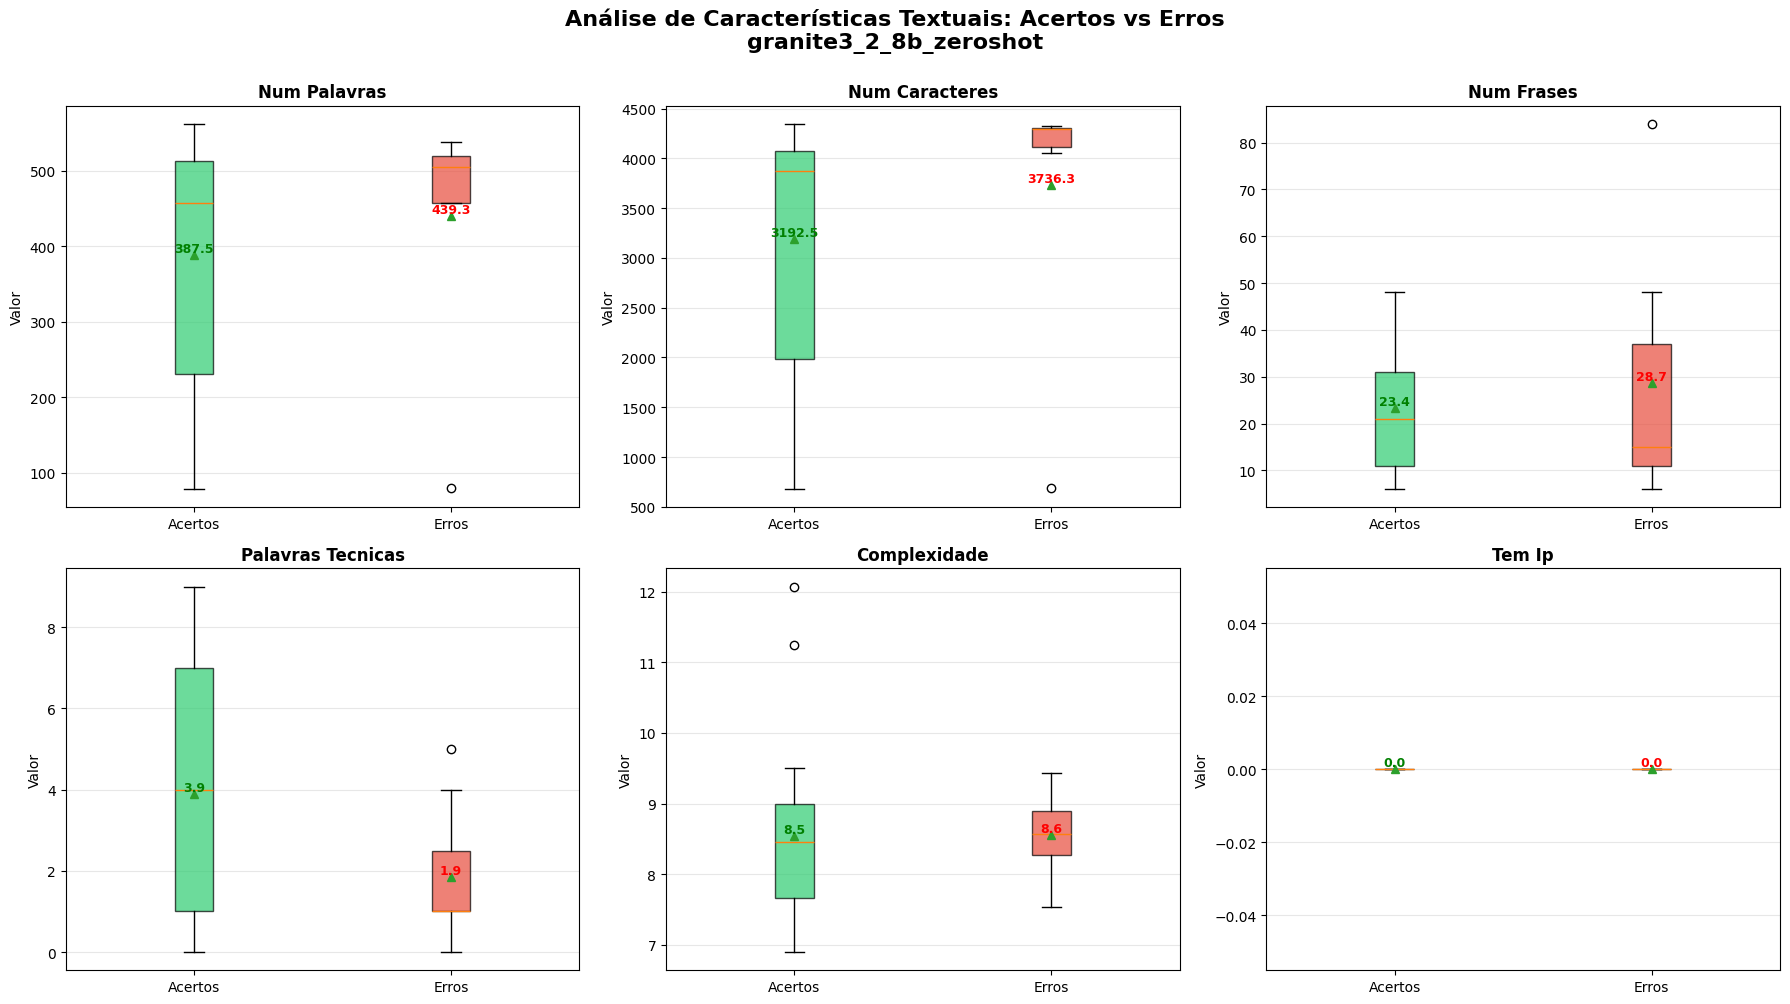


📊 Gráfico mostra distribuição e médias de cada característica


In [19]:
# Gráfico 1: Comparação de Características - Acertos vs Erros
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'Análise de Características Textuais: Acertos vs Erros\n{melhor_modelo}', 
             fontsize=16, fontweight='bold', y=1.00)

axes = axes.flatten()

caracteristicas_plot = ['num_palavras', 'num_caracteres', 'num_frases', 
                        'palavras_tecnicas', 'complexidade', 'tem_ip']

for idx, caracteristica in enumerate(caracteristicas_plot):
    ax = axes[idx]
    
    # Dados
    dados_acertos = df_acertos[caracteristica]
    dados_erros = df_erros[caracteristica]
    
    # Boxplot
    bp = ax.boxplot([dados_acertos, dados_erros], 
                     labels=['Acertos', 'Erros'],
                     patch_artist=True,
                     showmeans=True)
    
    # Colorir
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')
    bp['boxes'][0].set_alpha(0.7)
    bp['boxes'][1].set_alpha(0.7)
    
    # Título e labels
    ax.set_title(caracteristica.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Adicionar médias
    media_acertos = dados_acertos.mean()
    media_erros = dados_erros.mean()
    ax.text(1, media_acertos, f'{media_acertos:.1f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=9, color='green')
    ax.text(2, media_erros, f'{media_erros:.1f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=9, color='red')

plt.tight_layout()
plt.show()

print("\n📊 Gráfico mostra distribuição e médias de cada característica")

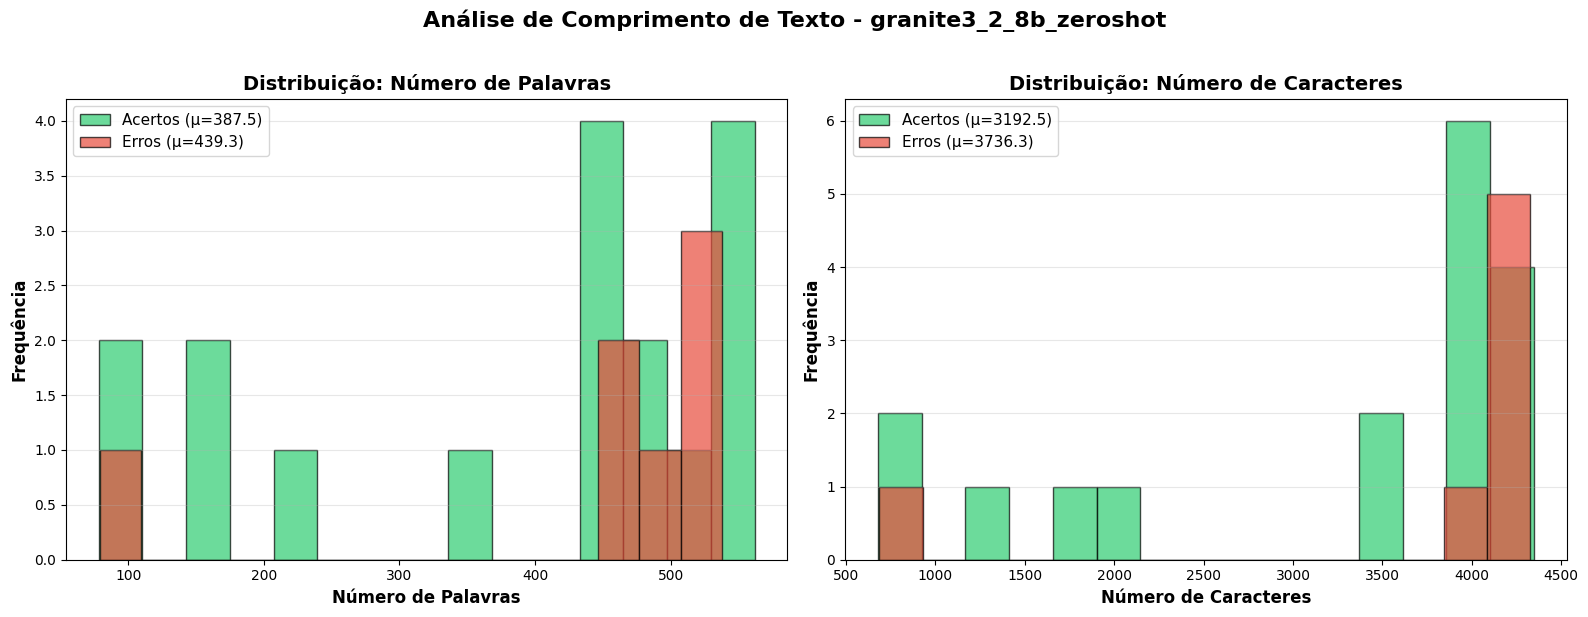

In [20]:
# Gráfico 2: Distribuição de Comprimento de Texto
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de palavras
axes[0].hist(df_acertos['num_palavras'], bins=15, alpha=0.7, color='#2ecc71', 
             label=f'Acertos (μ={df_acertos["num_palavras"].mean():.1f})', edgecolor='black')
axes[0].hist(df_erros['num_palavras'], bins=15, alpha=0.7, color='#e74c3c', 
             label=f'Erros (μ={df_erros["num_palavras"].mean():.1f})', edgecolor='black')
axes[0].set_xlabel('Número de Palavras', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequência', fontsize=12, fontweight='bold')
axes[0].set_title('Distribuição: Número de Palavras', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Histograma de caracteres
axes[1].hist(df_acertos['num_caracteres'], bins=15, alpha=0.7, color='#2ecc71', 
             label=f'Acertos (μ={df_acertos["num_caracteres"].mean():.1f})', edgecolor='black')
axes[1].hist(df_erros['num_caracteres'], bins=15, alpha=0.7, color='#e74c3c', 
             label=f'Erros (μ={df_erros["num_caracteres"].mean():.1f})', edgecolor='black')
axes[1].set_xlabel('Número de Caracteres', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequência', fontsize=12, fontweight='bold')
axes[1].set_title('Distribuição: Número de Caracteres', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle(f'Análise de Comprimento de Texto - {melhor_modelo}', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 2. Análise de Palavras-Chave (WordCloud)

In [21]:
# Extrair palavras mais comuns em acertos e erros
import string
from collections import Counter

# Stopwords em português
stopwords_pt = set([
    'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 
    'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 
    'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 
    'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo',
    'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo',
    'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você',
    'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha',
    'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós',
    'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse',
    'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu',
    'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela',
    'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles',
    'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão',
    'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos',
    'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam',
    'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos',
    'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos',
    'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam',
    'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos',
    'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria',
    'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos',
    'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja',
    'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos',
    'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos',
    'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham',
    'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha',
    'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver',
    'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria',
    'teríamos', 'teriam'
])

def extrair_palavras(textos_serie):
    """Extrai e conta palavras de uma série de textos"""
    todas_palavras = []
    
    for texto in textos_serie:
        if pd.notna(texto):
            # Limpar e tokenizar
            texto_limpo = str(texto).lower()
            texto_limpo = texto_limpo.translate(str.maketrans('', '', string.punctuation))
            palavras = texto_limpo.split()
            
            # Filtrar stopwords e palavras muito curtas
            palavras_filtradas = [
                p for p in palavras 
                if p not in stopwords_pt and len(p) > 3 and not p.isdigit()
            ]
            
            todas_palavras.extend(palavras_filtradas)
    
    return Counter(todas_palavras)

print("Extraindo palavras mais frequentes...")

# Extrair palavras de acertos e erros
palavras_acertos = extrair_palavras(df_acertos['target'])
palavras_erros = extrair_palavras(df_erros['target'])

print(f"\n✅ TOP 15 PALAVRAS NOS ACERTOS:")
for palavra, freq in palavras_acertos.most_common(15):
    print(f"   {palavra}: {freq} vezes")

print(f"\n❌ TOP 15 PALAVRAS NOS ERROS:")
for palavra, freq in palavras_erros.most_common(15):
    print(f"   {palavra}: {freq} vezes")

Extraindo palavras mais frequentes...

✅ TOP 15 PALAVRAS NOS ACERTOS:
   from: 56 vezes
   this: 50 vezes
   that: 36 vezes
   emailaddress83824c64b2: 33 vezes
   compromised: 29 vezes
   mail: 26 vezes
   email: 25 vezes
   rede: 24 vezes
   server: 24 vezes
   your: 24 vezes
   address: 24 vezes
   certbr: 23 vezes
   with: 23 vezes
   data: 21 vezes
   device: 21 vezes

❌ TOP 15 PALAVRAS NOS ERROS:
   from: 81 vezes
   ipaddressb29a075d57: 42 vezes
   invalid: 32 vezes
   user: 32 vezes
   port: 29 vezes
   server: 25 vezes
   this: 25 vezes
   rudra: 23 vezes
   keyhelp: 22 vezes
   abuse: 18 vezes
   ipaddress32a64212fc: 18 vezes
   pamunixsshdauth: 18 vezes
   authentication: 18 vezes
   failure: 18 vezes
   logname: 18 vezes


⚠️  Erro ao gerar WordCloud: Only supported for TrueType fonts
Instalando wordcloud... Execute: pip install wordcloud


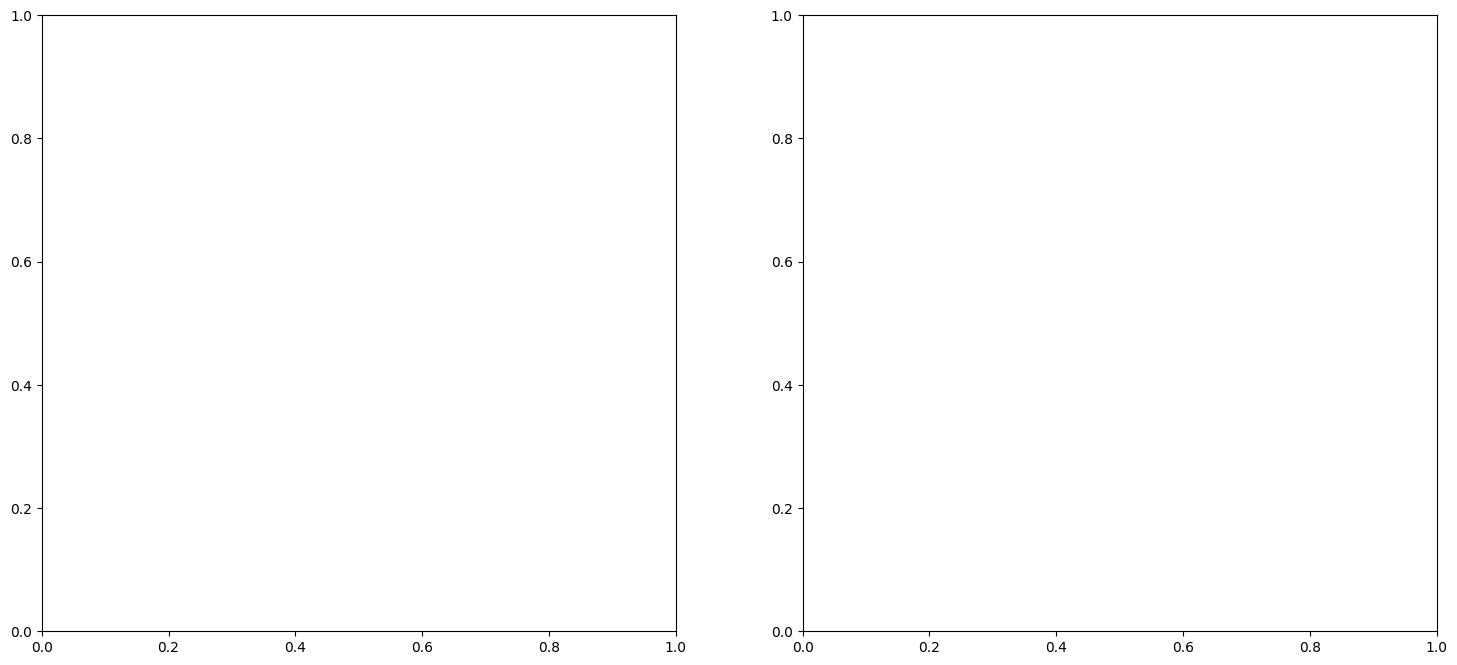

In [28]:
# WordClouds comparativas
try:
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # WordCloud para ACERTOS
    texto_acertos = ' '.join(df_acertos['target'].dropna().astype(str))
    if texto_acertos:
        wordcloud_acertos = WordCloud(
            width=800, height=400,
            background_color='white',
            colormap='Greens',
            stopwords=stopwords_pt,
            max_words=50,
            relative_scaling=0.5
        ).generate(texto_acertos)
        
        axes[0].imshow(wordcloud_acertos, interpolation='bilinear')
        axes[0].set_title(f'Palavras Frequentes nos ACERTOS\n({len(df_acertos)} casos)', 
                         fontsize=14, fontweight='bold', color='green')
        axes[0].axis('off')
    
    # WordCloud para ERROS
    texto_erros = ' '.join(df_erros['target'].dropna().astype(str))
    if texto_erros:
        wordcloud_erros = WordCloud(
            width=800, height=400,
            background_color='white',
            colormap='Reds',
            stopwords=stopwords_pt,
            max_words=50,
            relative_scaling=0.5
        ).generate(texto_erros)
        
        axes[1].imshow(wordcloud_erros, interpolation='bilinear')
        axes[1].set_title(f'Palavras Frequentes nos ERROS\n({len(df_erros)} casos)', 
                         fontsize=14, fontweight='bold', color='red')
        axes[1].axis('off')
    
    plt.suptitle(f'Análise de Palavras-Chave: Acertos vs Erros - {melhor_modelo}', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"⚠️  Erro ao gerar WordCloud: {e}")
    print("Instalando wordcloud... Execute: pip install wordcloud")

### 3. Análise de Padrões por Categoria

In [23]:
# Análise de características por categoria real
print("="*80)
print("ANÁLISE DE CARACTERÍSTICAS POR CATEGORIA")
print("="*80)

# Agrupar por categoria e calcular médias
analise_por_categoria = df_analise_completa.groupby('categoria_real').agg({
    'acertou': ['sum', 'count', 'mean'],
    'num_palavras': 'mean',
    'num_caracteres': 'mean',
    'palavras_tecnicas': 'mean',
    'complexidade': 'mean'
}).round(2)

# Renomear colunas
analise_por_categoria.columns = ['_'.join(col).strip() for col in analise_por_categoria.columns.values]
analise_por_categoria = analise_por_categoria.rename(columns={
    'acertou_sum': 'acertos',
    'acertou_count': 'total',
    'acertou_mean': 'taxa_acerto'
})

# Calcular taxa de acerto em %
analise_por_categoria['taxa_acerto_%'] = (analise_por_categoria['taxa_acerto'] * 100).round(2)

# Ordenar por taxa de acerto
analise_por_categoria = analise_por_categoria.sort_values('taxa_acerto_%', ascending=False)

print("\n")
print(analise_por_categoria.to_string())

# Identificar categorias problemáticas
print("\n" + "="*80)
print("CATEGORIAS MAIS DIFÍCEIS (menor taxa de acerto):")
print("="*80)
categorias_dificeis = analise_por_categoria.nsmallest(3, 'taxa_acerto_%')
for cat, row in categorias_dificeis.iterrows():
    print(f"\n📌 {cat}:")
    print(f"   Taxa de acerto: {row['taxa_acerto_%']:.2f}%")
    print(f"   Média de palavras: {row['num_palavras_mean']:.1f}")
    print(f"   Média de caracteres: {row['num_caracteres_mean']:.1f}")
    print(f"   Palavras técnicas: {row['palavras_tecnicas_mean']:.1f}")

ANÁLISE DE CARACTERÍSTICAS POR CATEGORIA


                acertos  total  taxa_acerto  num_palavras_mean  num_caracteres_mean  palavras_tecnicas_mean  complexidade_mean  taxa_acerto_%
categoria_real                                                                                                                               
CAT2                  4      4         1.00             452.25              3920.00                    3.50               8.65          100.0
CAT5                  4      4         1.00             510.50              4058.75                    6.00               7.98          100.0
CAT9                  4      4         1.00             118.75              1136.75                    1.00               9.33          100.0
CAT3                  3      4         0.75             536.00              3957.25                    6.25               7.46           75.0
CAT7                  2      4         0.50             298.25              2725.50                    2.

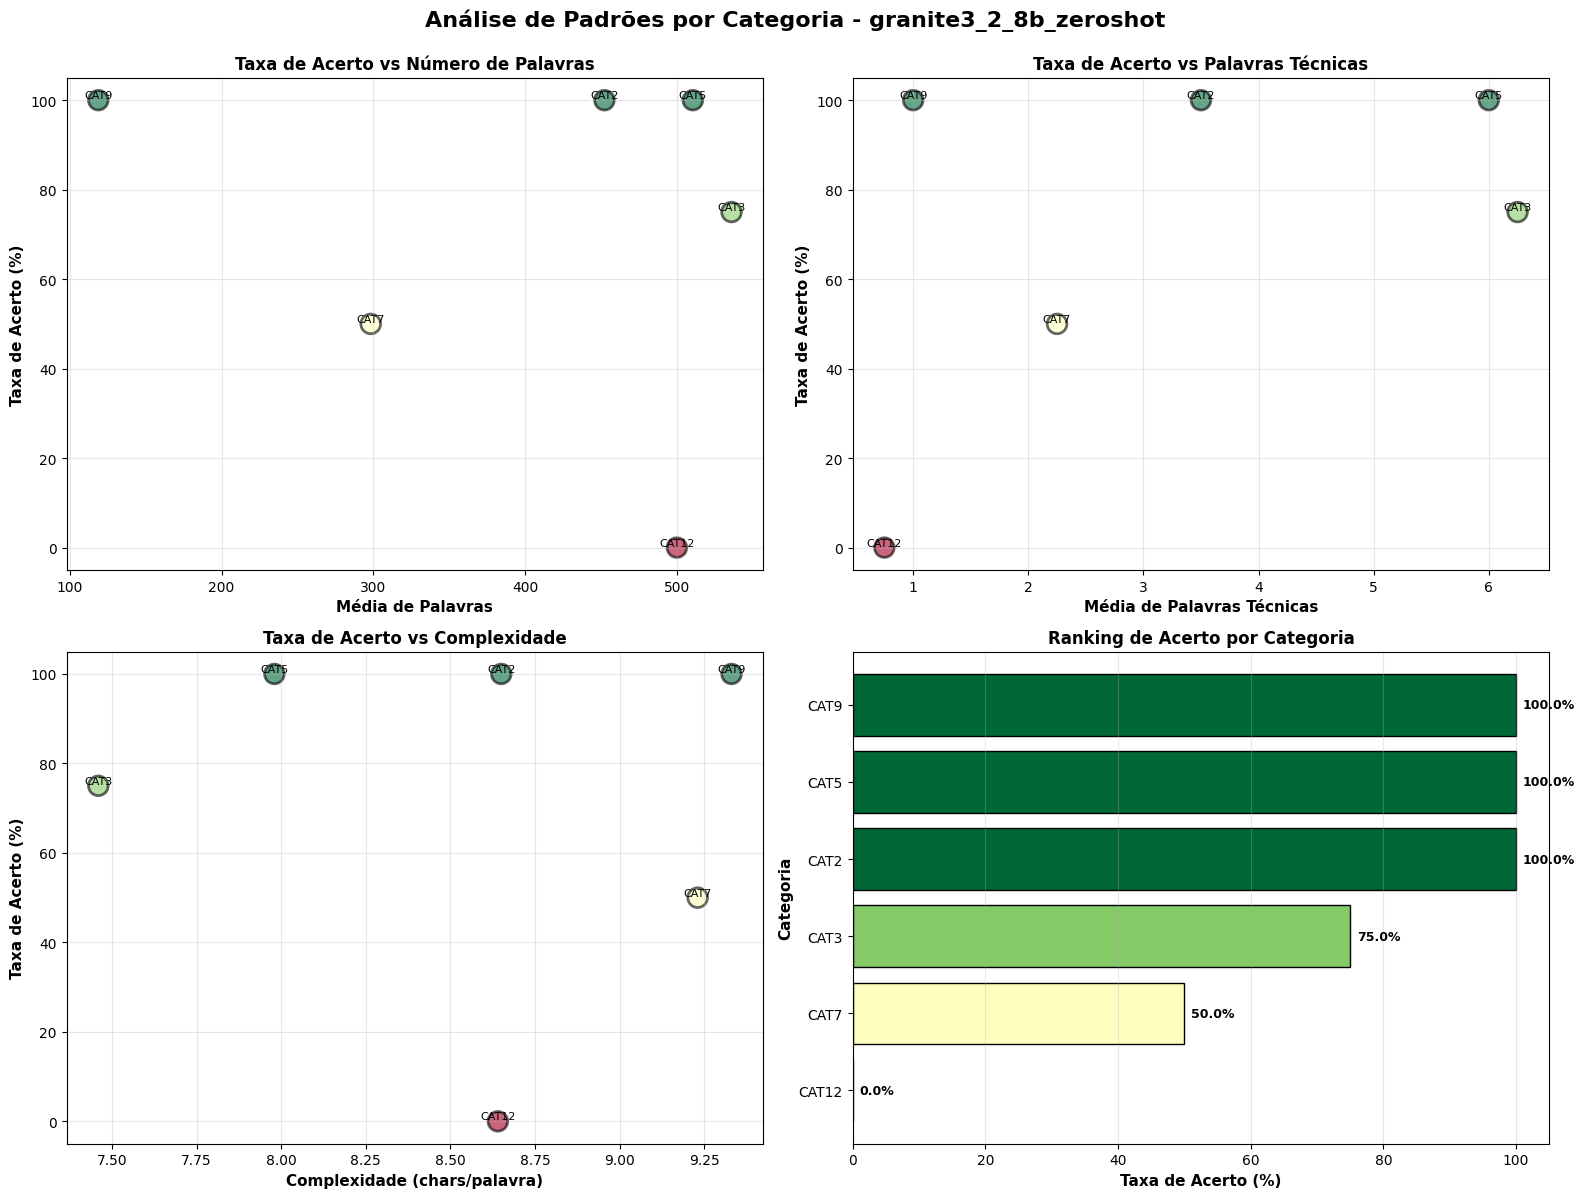

In [24]:
# Gráfico: Relação entre características e taxa de acerto por categoria
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Taxa de acerto vs Número de palavras
axes[0, 0].scatter(analise_por_categoria['num_palavras_mean'], 
                   analise_por_categoria['taxa_acerto_%'],
                   s=200, alpha=0.6, c=analise_por_categoria['taxa_acerto_%'], 
                   cmap='RdYlGn', edgecolors='black', linewidth=2)
axes[0, 0].set_xlabel('Média de Palavras', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Taxa de Acerto (%)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Taxa de Acerto vs Número de Palavras', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Adicionar labels das categorias
for cat, row in analise_por_categoria.iterrows():
    axes[0, 0].annotate(cat, 
                        (row['num_palavras_mean'], row['taxa_acerto_%']),
                        fontsize=8, ha='center', va='bottom')

# 2. Taxa de acerto vs Palavras técnicas
axes[0, 1].scatter(analise_por_categoria['palavras_tecnicas_mean'], 
                   analise_por_categoria['taxa_acerto_%'],
                   s=200, alpha=0.6, c=analise_por_categoria['taxa_acerto_%'], 
                   cmap='RdYlGn', edgecolors='black', linewidth=2)
axes[0, 1].set_xlabel('Média de Palavras Técnicas', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Taxa de Acerto (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Taxa de Acerto vs Palavras Técnicas', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

for cat, row in analise_por_categoria.iterrows():
    axes[0, 1].annotate(cat, 
                        (row['palavras_tecnicas_mean'], row['taxa_acerto_%']),
                        fontsize=8, ha='center', va='bottom')

# 3. Taxa de acerto vs Complexidade
axes[1, 0].scatter(analise_por_categoria['complexidade_mean'], 
                   analise_por_categoria['taxa_acerto_%'],
                   s=200, alpha=0.6, c=analise_por_categoria['taxa_acerto_%'], 
                   cmap='RdYlGn', edgecolors='black', linewidth=2)
axes[1, 0].set_xlabel('Complexidade (chars/palavra)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Taxa de Acerto (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Taxa de Acerto vs Complexidade', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

for cat, row in analise_por_categoria.iterrows():
    axes[1, 0].annotate(cat, 
                        (row['complexidade_mean'], row['taxa_acerto_%']),
                        fontsize=8, ha='center', va='bottom')

# 4. Barras: Taxa de acerto por categoria
categorias_ordenadas = analise_por_categoria.sort_values('taxa_acerto_%')
colors = plt.cm.RdYlGn(categorias_ordenadas['taxa_acerto_%'] / 100)
axes[1, 1].barh(categorias_ordenadas.index, categorias_ordenadas['taxa_acerto_%'], 
                color=colors, edgecolor='black')
axes[1, 1].set_xlabel('Taxa de Acerto (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Categoria', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Ranking de Acerto por Categoria', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

# Adicionar valores
for idx, (cat, val) in enumerate(categorias_ordenadas['taxa_acerto_%'].items()):
    axes[1, 1].text(val + 1, idx, f'{val:.1f}%', 
                    va='center', fontweight='bold', fontsize=9)

plt.suptitle(f'Análise de Padrões por Categoria - {melhor_modelo}', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### 4. Análise Consolidada - Todos os Modelos

In [25]:
# Analisar características para TODOS os modelos
print("Processando características textuais para todos os modelos...")

resultados_nlp_todos = []

for resultado in resultados_modelos:
    modelo = resultado['modelo']
    df_modelo = resultado['df'].copy()
    
    # Merge com textos
    df_modelo = df_modelo.merge(
        df_incidentes_completo[['id', 'target']], 
        on='id', 
        how='left'
    )
    
    # Extrair características
    caracteristicas = df_modelo['target'].apply(extrair_caracteristicas_texto)
    df_carac = pd.DataFrame(caracteristicas.tolist())
    df_modelo_completo = pd.concat([df_modelo, df_carac], axis=1)
    
    # Separar acertos e erros
    df_acertos_m = df_modelo_completo[df_modelo_completo['acertou'] == 1]
    df_erros_m = df_modelo_completo[df_modelo_completo['acertou'] == 0]
    
    # Calcular médias
    if len(df_acertos_m) > 0 and len(df_erros_m) > 0:
        for caracteristica in ['num_palavras', 'num_caracteres', 'palavras_tecnicas', 'complexidade']:
            media_acertos = df_acertos_m[caracteristica].mean()
            media_erros = df_erros_m[caracteristica].mean()
            diferenca = ((media_acertos - media_erros) / media_erros * 100) if media_erros > 0 else 0
            
            resultados_nlp_todos.append({
                'modelo': modelo,
                'caracteristica': caracteristica,
                'media_acertos': round(media_acertos, 2),
                'media_erros': round(media_erros, 2),
                'diferenca_%': round(diferenca, 2),
                'acuracia': resultado['percentual_acerto']
            })

df_nlp_consolidado = pd.DataFrame(resultados_nlp_todos)

print("✅ Análise consolidada concluída!")
print(f"\nTotal de registros: {len(df_nlp_consolidado)}")
df_nlp_consolidado.head(20)

Processando características textuais para todos os modelos...
✅ Análise consolidada concluída!

Total de registros: 108


,modelo,caracteristica,media_acertos,media_erros,diferenca_%,acuracia
0,deepseek_15b_zeroshot,num_palavras,452.25,392.70,15.16,16.67
1,deepseek_15b_zeroshot,num_caracteres,3922.75,3236.80,21.19,16.67
2,deepseek_15b_zeroshot,palavras_tecnicas,5.25,2.90,81.03,16.67
3,deepseek_15b_zeroshot,complexidade,8.98,8.47,6.02,16.67
4,deepseek_r1_14b_zeroshot,num_palavras,371.64,446.00,-16.67,58.33
5,deepseek_r1_14b_zeroshot,num_caracteres,2977.64,3874.00,-23.14,58.33
6,deepseek_r1_14b_zeroshot,palavras_tecnicas,4.14,2.10,97.28,58.33
7,deepseek_r1_14b_zeroshot,complexidade,8.43,8.72,-3.33,58.33
8,deepseek_r1_32b_zeroshot,num_palavras,383.43,429.50,-10.73,58.33
9,deepseek_r1_32b_zeroshot,num_caracteres,3161.93,3616.00,-12.56,58.33


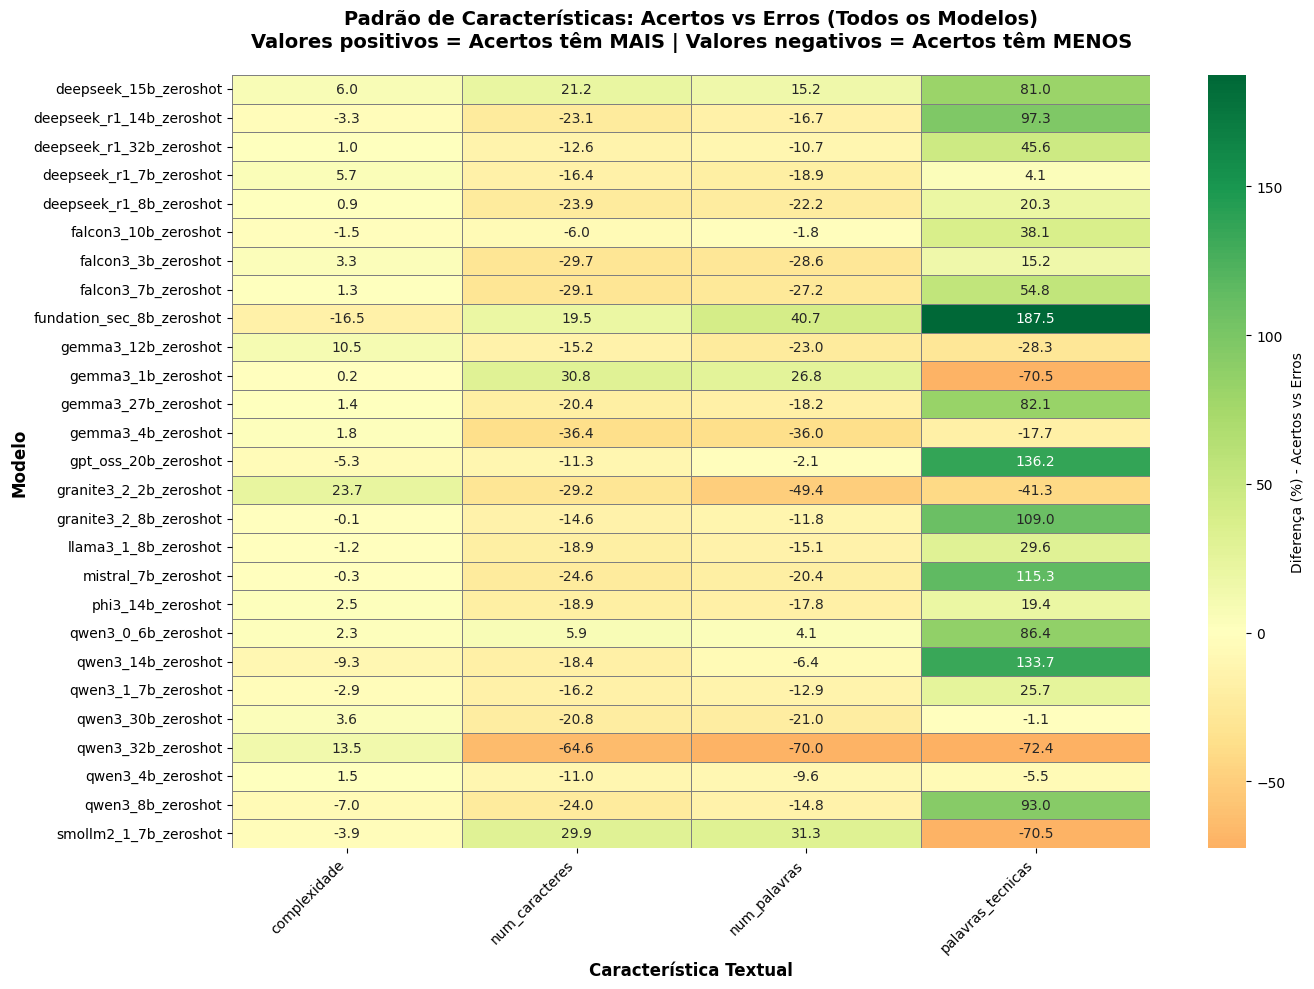


🔍 INTERPRETAÇÃO:
- Valores VERDES (+): Acertos têm característica MAIOR que erros
- Valores VERMELHOS (-): Acertos têm característica MENOR que erros
- Valores próximos de 0: Sem diferença significativa


In [26]:
# Heatmap: Diferença percentual de características entre acertos e erros (todos os modelos)
pivot_diferenca = df_nlp_consolidado.pivot(
    index='modelo', 
    columns='caracteristica', 
    values='diferenca_%'
)

fig, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(pivot_diferenca, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Diferença (%) - Acertos vs Erros'},
            linewidths=0.5, linecolor='gray', ax=ax)

ax.set_title('Padrão de Características: Acertos vs Erros (Todos os Modelos)\n' +
             'Valores positivos = Acertos têm MAIS | Valores negativos = Acertos têm MENOS',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Característica Textual', fontsize=12, fontweight='bold')
ax.set_ylabel('Modelo', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n🔍 INTERPRETAÇÃO:")
print("- Valores VERDES (+): Acertos têm característica MAIOR que erros")
print("- Valores VERMELHOS (-): Acertos têm característica MENOR que erros")
print("- Valores próximos de 0: Sem diferença significativa")

### 5. Conclusões e Padrões Identificados

In [27]:
# Resumo dos padrões identificados
print("="*100)
print("PADRÕES IDENTIFICADOS - RESUMO EXECUTIVO")
print("="*100)

# 1. Padrões de características mais consistentes
print("\n1️⃣ PADRÕES MAIS CONSISTENTES (presentes em mais modelos):")
print("-"*100)

for caracteristica in ['num_palavras', 'num_caracteres', 'palavras_tecnicas', 'complexidade']:
    df_carac = df_nlp_consolidado[df_nlp_consolidado['caracteristica'] == caracteristica]
    
    # Contar quantos modelos têm diferença significativa (>10% ou <-10%)
    modelos_com_padrao_pos = (df_carac['diferenca_%'] > 10).sum()
    modelos_com_padrao_neg = (df_carac['diferenca_%'] < -10).sum()
    media_diferenca = df_carac['diferenca_%'].mean()
    
    print(f"\n📊 {caracteristica.replace('_', ' ').upper()}:")
    print(f"   Diferença média: {media_diferenca:+.2f}%")
    print(f"   Modelos com acertos MAIORES (>10%): {modelos_com_padrao_pos}")
    print(f"   Modelos com acertos MENORES (<-10%): {modelos_com_padrao_neg}")
    
    if abs(media_diferenca) > 5:
        if media_diferenca > 0:
            print(f"   ✅ PADRÃO: Acertos tendem a ter MAIS {caracteristica.replace('_', ' ')}")
        else:
            print(f"   ✅ PADRÃO: Acertos tendem a ter MENOS {caracteristica.replace('_', ' ')}")

# 2. Correlação entre acurácia e características
print("\n\n2️⃣ CORRELAÇÃO: ACURÁCIA DO MODELO vs CARACTERÍSTICAS:")
print("-"*100)

for caracteristica in ['num_palavras', 'palavras_tecnicas', 'complexidade']:
    df_carac = df_nlp_consolidado[df_nlp_consolidado['caracteristica'] == caracteristica]
    
    # Correlação entre acurácia e diferença de característica
    correlacao = df_carac[['acuracia', 'diferenca_%']].corr().iloc[0, 1]
    
    print(f"\n{caracteristica.replace('_', ' ').title()}")
    print(f"   Correlação com acurácia: {correlacao:.3f}")
    
    if abs(correlacao) > 0.3:
        if correlacao > 0:
            print(f"   ✅ Modelos mais precisos têm MAIOR diferença nesta característica")
        else:
            print(f"   ⚠️  Modelos mais precisos têm MENOR diferença nesta característica")

# 3. Salvar análise
output_nlp = 'experimentos/analise_nlp_zeroshot.xlsx'
df_nlp_consolidado.to_excel(output_nlp, index=False)
print(f"\n\n💾 Análise NLP salva em: {output_nlp}")

PADRÕES IDENTIFICADOS - RESUMO EXECUTIVO

1️⃣ PADRÕES MAIS CONSISTENTES (presentes em mais modelos):
----------------------------------------------------------------------------------------------------

📊 NUM PALAVRAS:
   Diferença média: -12.46%
   Modelos com acertos MAIORES (>10%): 4
   Modelos com acertos MENORES (<-10%): 18
   ✅ PADRÃO: Acertos tendem a ter MENOS num palavras

📊 NUM CARACTERES:
   Diferença média: -14.00%
   Modelos com acertos MAIORES (>10%): 4
   Modelos com acertos MENORES (<-10%): 21
   ✅ PADRÃO: Acertos tendem a ter MENOS num caracteres

📊 PALAVRAS TECNICAS:
   Diferença média: +39.53%
   Modelos com acertos MAIORES (>10%): 18
   Modelos com acertos MENORES (<-10%): 6
   ✅ PADRÃO: Acertos tendem a ter MAIS palavras tecnicas

📊 COMPLEXIDADE:
   Diferença média: +1.04%
   Modelos com acertos MAIORES (>10%): 3
   Modelos com acertos MENORES (<-10%): 1


2️⃣ CORRELAÇÃO: ACURÁCIA DO MODELO vs CARACTERÍSTICAS:
-------------------------------------------------------

# Escolha de Modelos SLMs

## Objetivo

Calcular um **score de raridade arquitetural** para cada modelo, priorizando modelos com **combinações únicas** de características técnicas. Isso garante:

1. **Diversidade máxima** no conjunto de modelos testados
2. **Cobertura representativa** das arquiteturas existentes
3. **Evitar redundância** entre modelos similares
4. **Identificar arquiteturas pouco representativas** que merecem atenção especial


## Características Avaliadas

A métrica considera **4 dimensões arquiteturais**:

| Característica | Tipo | Exemplos | Impacto |
|----------------|------|----------|---------|
| **Attention** | Categórico | MHA, GQA, MLA, MoE | Mecanismo de atenção do modelo |
| **Activation** | Categórico | SwiGLU, GeGLU, ReLU | Função de ativação das camadas |
| **Layer Norm** | Categórico | RMSNorm, LayerNorm | Método de normalização |
| **Context Window** | Numérico | 8K, 128K, 262K tokens | Capacidade de contexto |

---

## Fórmula do Score de Raridade

### 1. Cálculo de Pesos Individuais

Para cada característica categórica, o peso de raridade é dado por:

$$\text{Peso}(\text{valor}) = \frac{N}{\text{contagem}(\text{valor})}$$

Onde:
- $N$ = número total de modelos no dataset
- $\text{contagem}(\text{valor})$ = quantas vezes aquele valor aparece

**Interpretação**: Valores raros recebem pesos altos, valores comuns recebem pesos baixos.

### 2. Normalização do Context Window

Como o Context Window é numérico e possui valores muito maiores que os pesos categóricos, aplicamos normalização:

$$\text{Peso}_{\text{Context}}^{\text{norm}} = \frac{\text{Peso}_{\text{Context}}}{\max(\text{Peso}_{\text{Context}})} \times \overline{\text{Peso}_{\text{Attention}}}$$

Isso mantém todas as características na mesma escala de grandeza.

### 3. Score Final

O score total do modelo é a **média aritmética dos 4 pesos**:

$$\text{Score}_{\text{Raridade}} = \frac{\text{Peso}_{\text{Attention}} + \text{Peso}_{\text{Activation}} + \text{Peso}_{\text{LayerNorm}} + \text{Peso}_{\text{Context}}^{\text{norm}}}{4}$$

**Quanto maior o score, mais rara/única é a arquitetura do modelo.**


## Filtro de Versões

Antes do cálculo de raridade, aplicamos um **filtro de versões mais recentes**:

### Regra
Para cada combinação de **(Família, Tamanho)**, mantemos apenas a **versão mais recente**.

### Exemplos
- **Phi-3 14B** vs **Phi-4 14B** → Mantém apenas **Phi-4 14B**
- **Qwen2.5 8B** vs **Qwen3 8B** → Mantém apenas **Qwen3 8B**
- **Llama 3.1 70B** vs **Llama 3.3 70B** → Mantém apenas **Llama 3.3 70B** 

### Justificativa
- Evita testar múltiplas versões do mesmo modelo base
- Prioriza arquiteturas mais modernas e otimizadas
- Reduz redundância mantendo diversidade arquitetural


## Interpretação dos Scores

### Alta Raridade (Score > 10)
Arquiteturas diferenciadas com combinações pouco comuns:
- **DeepSeek R1**: MLA (Multi-head Latent Attention) - único com essa arquitetura
- **Falcon3**: ReLU + LayerNorm - combinação rara em modelos modernos
- **GPT-OSS**: MoE (Mixture of Experts) - poucos modelos usam

### Raridade Moderada (Score 5-10)
Combinações menos comuns, mas não únicas:
- **Phi-4**: MHA + GeGLU - menos comum que GQA
- **Gemma**: GQA + GeGLU - GeGLU é menos comum que SwiGLU

### Baixa Raridade (Score < 5)
Arquitetura padrão predominante:
- **GQA + SwiGLU + RMSNorm + 128K tokens** - configuração mais comum
- Presente em Llama, Mistral, Qwen, etc.


## Estratégia de Seleção

### Categorias de Tamanho
- **Categoria ~8B**: Modelos entre 7B e 20B parâmetros
- **Categoria ~70B**: Modelos entre 32B e 70B parâmetros

### Processo de Seleção
1. Filtrar modelos por faixa de tamanho
2. Ordenar por score de raridade (decrescente)
3. Selecionar **Top N modelos** mais raros
4. **Garantir inclusão de baselines** importantes (mesmo com raridade baixa)

### Baselines Obrigatórios
Modelos de referência que sempre entram na seleção:
- **Llama 3.1 8B** e **Llama 3.3 70B** - Referências open-source
- **Foundation-Sec 8B** - Modelo especializado em segurança
- **GPT-OSS 20B** - Arquitetura MoE rara
- **Granite3.2 8B** - Modelo recente da IBM

---

## Vantagens da Métrica

- **Objetiva e Quantificável**: Baseada em frequências reais dos dados  
- **Escalável**: Funciona para qualquer tamanho de dataset  
- **Adaptativa**: Atualiza automaticamente com novos modelos  
- **Transparente**: Fórmula clara e auditável  
- **Balanceada**: Combina múltiplas dimensões arquiteturais  
- **Prática**: Garante diversidade sem perder modelos-referência  

---

## Exemplo Prático

Considere um dataset com:
- 40 modelos GQA, 10 modelos MHA, 5 modelos MLA
- 45 modelos SwiGLU, 8 modelos GeGLU, 2 modelos ReLU

### Cálculo para DeepSeek R1 8B (MLA + SwiGLU + RMSNorm + 128K)

$$\text{Peso}_{\text{Attention}} = \frac{55}{5} = 11.0 \quad \text{(MLA é raro)}$$

$$\text{Peso}_{\text{Activation}} = \frac{55}{45} = 1.22 \quad \text{(SwiGLU é comum)}$$

$$\text{Peso}_{\text{LayerNorm}} = \frac{55}{50} = 1.10 \quad \text{(RMSNorm é comum)}$$

$$\text{Peso}_{\text{Context}}^{\text{norm}} = 1.5 \quad \text{(após normalização)}$$

$$\text{Score}_{\text{Raridade}} = \frac{11.0 + 1.22 + 1.10 + 1.5}{4} = \mathbf{3.71}$$

O **MLA contribui fortemente** para um score elevado, tornando DeepSeek um modelo prioritário para testes.

##  Conclusão

Esta métrica permite selecionar um conjunto **diverso e representativo** de LLMs, garantindo:
- Cobertura de diferentes paradigmas arquiteturais
- Identificação de inovações técnicas importantes
- Eficiência nos testes (evita redundância)


In [57]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def extract_family_version(text):
    """
    Extrai o nome da família e a versão principal de um modelo LLM.
    """
    pattern = re.compile(
        r"""
        (?i)                                  
        (?:fdtn-ai/)?                         
        (?P<family>                           
            llama|mistral|qwen|phi|gemma|granite|
            falcon|smollm2?|cogito|deepseek|foundation-sec|gpt-oss|tinyllama
        )
        [\s\-\_:]*                            
        (?P<version>\d+(?:\.\d+)?)?           
        """,
        re.VERBOSE
    )
    match = pattern.search(text)
    if match:
        family = match.group("family").lower()
        version = match.group("version")
        return {"family": family, "version": version if version else "1"}
    return {"family": "unknown", "version": "1"}

def parse_size(s):
    """Converte tamanho para número (em bilhões)."""
    if pd.isna(s):
        return np.nan
    s = str(s).strip().upper().replace(',', '.')
    if 'B' in s:
        return float(s.replace('B', ''))
    elif 'M' in s:
        return float(s.replace('M', '')) / 1000
    else:
        try:
            return float(s)
        except:
            return np.nan

def parse_context_window(s):
    """Converte context window para número."""
    if pd.isna(s):
        return np.nan
    s = str(s).replace(',', '').replace('.', '')
    try:
        return int(s)
    except:
        return np.nan

def model_name_modelling(name_model):
    """Normaliza nome do modelo."""
    aux = name_model.replace(':', ' ').replace('-', '').lower()
    return aux

def calculate_rarity_weights(df, column):
    """
    Calcula peso de raridade para uma coluna categórica ou numérica.
    Para categóricas: peso = N / frequência
    Para numéricas: agrupa valores similares e calcula raridade
    """
    N = len(df)
    
    if df[column].dtype == 'object':
        # Coluna categórica
        freq = df[column].value_counts()
        weights = {val: N / count for val, count in freq.items()}
    else:
        # Coluna numérica (Context Window)
        # Agrupa valores em bins para calcular raridade
        unique_vals = df[column].value_counts()
        weights = {val: N / count for val, count in unique_vals.items()}
    
    return df[column].map(weights)

def keep_latest_version(df):
    """
    Mantém apenas a versão mais recente para cada família e tamanho.
    """
    df['version_num'] = df['Version'].apply(lambda x: float(x) if x and x != 'None' else 0.0)
    
    # Agrupa por família e tamanho, mantém a maior versão
    df_sorted = df.sort_values(['Family', 'Size_number', 'version_num'], ascending=[True, True, False])
    df_latest = df_sorted.groupby(['Family', 'Size_number']).first().reset_index()
    
    # Retorna os índices originais dos modelos mantidos
    kept_indices = []
    for _, row in df_latest.iterrows():
        mask = (
            (df['Family'] == row['Family']) & 
            (df['Size_number'] == row['Size_number']) & 
            (df['version_num'] == row['version_num'])
        )
        idx = df[mask].index[0]
        kept_indices.append(idx)
    
    return df.loc[kept_indices].copy()

### ==================== PROCESSAMENTO ====================

In [59]:
# Carregar dados
df = pd.read_csv("SLMs disponiveis no ollama - Página1 (1).csv")

# Processar colunas básicas
df['Size_number'] = df['Model Size'].apply(parse_size)
df['Context_number'] = df['Context Window (tokens)'].apply(parse_context_window)
df['Family'] = df['Model'].apply(lambda x: extract_family_version(x)['family'])
df['Version'] = df['Model'].apply(lambda x: extract_family_version(x)['version'])

# Limpar dados
df = df.dropna(subset=['Size_number', 'Attention', 'Activation', 'Layer Norm', 'Context_number']).copy()
df['Model'] = df['Model'].apply(model_name_modelling)
df = df.drop_duplicates(subset=['Model', 'Model Size', 'Attention', 'Activation', 'Layer Norm']).reset_index(drop=True)

# Manter apenas versões mais recentes
print(f"Total de modelos antes do filtro: {len(df)}")
df = keep_latest_version(df)
print(f"Total de modelos após manter apenas versões mais recentes: {len(df)}")

# ==================== CÁLCULO DE RARIDADE ====================

# Calcular pesos de raridade para cada característica
df['Weight_Attention'] = calculate_rarity_weights(df, 'Attention')
df['Weight_Activation'] = calculate_rarity_weights(df, 'Activation')
df['Weight_LayerNorm'] = calculate_rarity_weights(df, 'Layer Norm')
df['Weight_Context'] = calculate_rarity_weights(df, 'Context_number')

# Normalizar peso do Context Window (geralmente tem valores muito altos)
max_context_weight = df['Weight_Context'].max()
df['Weight_Context_normalized'] = df['Weight_Context'] / max_context_weight * df['Weight_Attention'].mean()

# Score final: média dos 4 pesos (3 categóricos + 1 numérico normalizado)
df['Rarity_Score'] = (
    df['Weight_Attention'] + 
    df['Weight_Activation'] + 
    df['Weight_LayerNorm'] + 
    df['Weight_Context_normalized']
) / 4

# ==================== SELEÇÃO DE MODELOS ====================

# Filtrar por faixas de tamanho
df_8b = df[(df['Size_number'] >= 7) & (df['Size_number'] <= 20)].copy()
df_70b = df[(df['Size_number'] >= 32) & (df['Size_number'] <= 70)].copy()

# Ordenar por raridade
df_8b = df_8b.sort_values('Rarity_Score', ascending=False)
df_70b = df_70b.sort_values('Rarity_Score', ascending=False)

# Selecionar top N
top_8b = 10
top_70b = 10

selected_8b = df_8b.head(top_8b).index.tolist()
selected_70b = df_70b.head(top_70b).index.tolist()

# Garantir baselines (força inclusão mesmo que não sejam tão raros)
baselines = [
    "llama 3.1 8b", "foundationsec 8b", "llama 3.3 70b", 
    "gptoss 20b", "granite3.2 8b"
]

for baseline in baselines:
    match = df[df['Model'].str.replace(' ', '').str.replace('.', '') == baseline.replace(' ', '').replace('.', '')]
    if not match.empty:
        idx = match.index[0]
        size = df.loc[idx, 'Size_number']
        
        if 7 <= size <= 20:
            if idx not in selected_8b:
                if len(selected_8b) < top_8b:
                    selected_8b.append(idx)
                else:
                    selected_8b[-1] = idx
        elif 32 <= size <= 70:
            if idx not in selected_70b:
                if len(selected_70b) < top_70b:
                    selected_70b.append(idx)
                else:
                    selected_70b[-1] = idx

# Marcar escolhidos
df['Escolha'] = ""
selected_8b = selected_8b + [54]
selected_8b = selected_8b + [0]
df.loc[selected_8b + selected_70b, 'Escolha'] = "Sim"

Total de modelos antes do filtro: 60
Total de modelos após manter apenas versões mais recentes: 54


In [60]:
df

,Model,Model Size,Context Window (tokens),Attention,Activation,Layer Norm,Size_number,Context_number,Family,Version,version_num,Weight_Attention,Weight_Activation,Weight_LayerNorm,Weight_Context,Weight_Context_normalized,Rarity_Score,Escolha
55,cogito 3b,3B,128000,MHA,SwiGLU,RMSNorm,3.000,128000,cogito,3,3.0,3.857143,1.35,1.08,2.700000,0.250000,1.634286,
56,cogito 8b,8B,128000,MHA,SwiGLU,RMSNorm,8.000,128000,cogito,8,8.0,3.857143,1.35,1.08,2.700000,0.250000,1.634286,
57,cogito 14b,14B,128000,MHA,SwiGLU,RMSNorm,14.000,128000,cogito,14,14.0,3.857143,1.35,1.08,2.700000,0.250000,1.634286,
58,cogito 32b,32B,128000,MHA,SwiGLU,RMSNorm,32.000,128000,cogito,32,32.0,3.857143,1.35,1.08,2.700000,0.250000,1.634286,Sim
59,cogito 70b,70B,128000,MHA,SwiGLU,RMSNorm,70.000,128000,cogito,70,70.0,3.857143,1.35,1.08,2.700000,0.250000,1.634286,Sim
36,deepseek r1 1.5b,1.5B,128000,MLA,SwiGLU,RMSNorm,1.500,128000,deepseek,1,1.0,9.000000,1.35,1.08,2.700000,0.250000,2.920000,
37,deepseek r1 7b,7B,128000,MLA,SwiGLU,RMSNorm,7.000,128000,deepseek,1,1.0,9.000000,1.35,1.08,2.700000,0.250000,2.920000,Sim
38,deepseek r1 8b,8B,128000,MLA,SwiGLU,RMSNorm,8.000,128000,deepseek,1,1.0,9.000000,1.35,1.08,2.700000,0.250000,2.920000,Sim
39,deepseek r1 14b,14B,128000,MLA,SwiGLU,RMSNorm,14.000,128000,deepseek,1,1.0,9.000000,1.35,1.08,2.700000,0.250000,2.920000,Sim
40,deepseek r1 32b,32B,128000,MLA,SwiGLU,RMSNorm,32.000,128000,deepseek,1,1.0,9.000000,1.35,1.08,2.700000,0.250000,2.920000,Sim


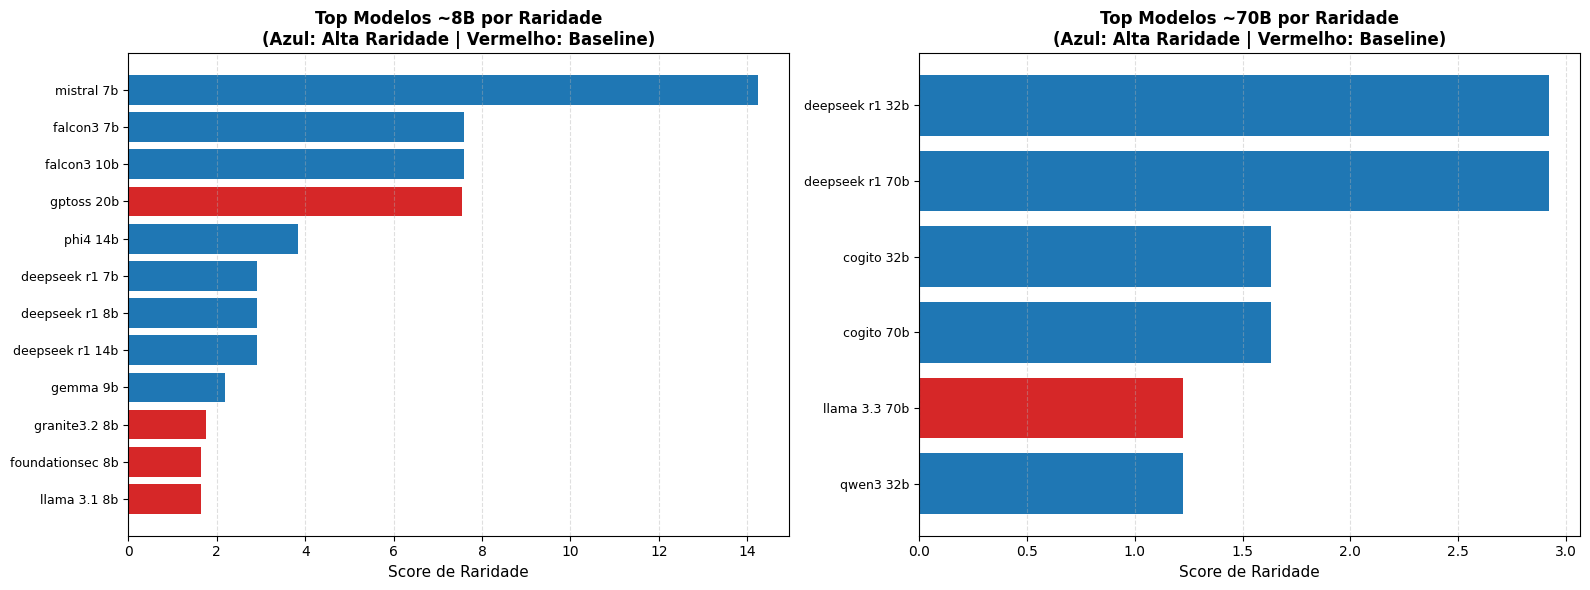

In [61]:
# ==================== VISUALIZAÇÃO ====================

# Preparar dados para visualização
baselines_normalized = [b.replace(' ', '').replace('.', '') for b in baselines]
df_vis_8b = df.loc[selected_8b, ['Model', 'Model Size', 'Attention', 'Activation', 
                                   'Layer Norm', 'Context Window (tokens)', 'Rarity_Score']].copy()
df_vis_70b = df.loc[selected_70b, ['Model', 'Model Size', 'Attention', 'Activation', 
                                     'Layer Norm', 'Context Window (tokens)', 'Rarity_Score']].copy()

df_vis_8b['Color'] = df_vis_8b['Model'].apply(
    lambda x: 'tab:red' if x.replace(' ', '').replace('.', '') in baselines_normalized else 'tab:blue'
)
df_vis_70b['Color'] = df_vis_70b['Model'].apply(
    lambda x: 'tab:red' if x.replace(' ', '').replace('.', '') in baselines_normalized else 'tab:blue'
)

# Plotar
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: ~8B
axes[0].barh(df_vis_8b['Model'], df_vis_8b['Rarity_Score'], color=df_vis_8b['Color'])
axes[0].set_xlabel('Score de Raridade', fontsize=11)
axes[0].set_title('Top Modelos ~8B por Raridade\n(Azul: Alta Raridade | Vermelho: Baseline)', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', linestyle='--', alpha=0.4)
axes[0].tick_params(axis='y', labelsize=9)

# Gráfico 2: ~70B
axes[1].barh(df_vis_70b['Model'], df_vis_70b['Rarity_Score'], color=df_vis_70b['Color'])
axes[1].set_xlabel('Score de Raridade', fontsize=11)
axes[1].set_title('Top Modelos ~70B por Raridade\n(Azul: Alta Raridade | Vermelho: Baseline)', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', linestyle='--', alpha=0.4)
axes[1].tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.savefig("rarity_score_improved.png", dpi=150, bbox_inches='tight')
plt.show()

In [23]:
# ==================== RELATÓRIO ====================

print("\n" + "="*70)
print("MODELOS SELECIONADOS - CATEGORIA ~8B")
print("="*70)
print(df_vis_8b.to_string(index=False))

print("\n" + "="*70)
print("MODELOS SELECIONADOS - CATEGORIA ~70B")
print("="*70)
print(df_vis_70b.to_string(index=False))

print("\n" + "="*70)
print("DISTRIBUIÇÃO DE CARACTERÍSTICAS")
print("="*70)
print("\nAttention:")
print(df['Attention'].value_counts())
print("\nActivation:")
print(df['Activation'].value_counts())
print("\nLayer Norm:")
print(df['Layer Norm'].value_counts())
print("\nContext Windows únicos:")
print(df['Context_number'].value_counts().head(10))

# Salvar resultados
df.to_excel("SLMs_Raridade_Aprimorada.xlsx", sheet_name="Raridade", index=False)
print("\n✓ Arquivo salvo: SLMs_Raridade_Aprimorada.xlsx")


MODELOS SELECIONADOS - CATEGORIA ~8B
           Model Model Size Attention Activation Layer Norm Context Window (tokens)  Rarity_Score    Color
      mistral 7b         7B  GQA, SWA     SwiGLU    RMSNorm                  32,768     14.232500 tab:blue
      falcon3 7b         7B       GQA       ReLU  LayerNorm                   32000      7.602151 tab:blue
     falcon3 10b        10B       GQA       ReLU  LayerNorm                   32000      7.602151 tab:blue
      gptoss 20b        20B       MoE     SwiGLU    RMSNorm                 131,072      7.536071  tab:red
        phi4 14b        14B       MHA      GeGLU    RMSNorm                   16000      3.834286 tab:blue
  deepseek r1 7b         7B       MLA     SwiGLU    RMSNorm                  128000      2.920000 tab:blue
  deepseek r1 8b         8B       MLA     SwiGLU    RMSNorm                  128000      2.920000 tab:blue
 deepseek r1 14b        14B       MLA     SwiGLU    RMSNorm                  128000      2.920000 tab:blue

In [301]:
df_vis_70b.shape

(6, 8)

In [300]:
selected_8b

[5, 49, 50, 53, 26, 37, 38, 39, 28, np.int64(52)]